# Environment 

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 23.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=fe9e01af3c67aa6d6822c1a9fa2207dcdd1e5fdbbf37512c7a319ccff8eb2749
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 7.5 MB/s 
     |████████████████████████████████| 81 kB 12.4 MB/s 
     |████████████████████████████████| 209 kB 70.1 MB/s 
     |████████████████████████████████| 78 kB 8.7 MB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 
     |████████████████████████████████| 146 kB 61.5 MB/s 
     |████████████████████████████████| 112 kB 48.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=ad8c1ee72af94b65b8a10c81478a51617e0f54322615a01eb17d49a6bd4e6de3
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
# libraries importation: 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import datetime

# Statistics libraries
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import t

In [ ]:
# Matplotlib Darkmode
from matplotlib import cycler

colors = cycler('color',['#2a7beb', '#0F9D58', '#7669d1',
                         '#edc22d', '#52bb44', '#e65050'])
plt.rc('axes',linewidth=1,prop_cycle=colors,grid=True)
plt.rc('grid',linewidth=0.25, color = 'gray')
plt.rc('lines',linewidth=2, color = 'gray')
plt.rc('xtick',direction='in',top=True)
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"] =  7.5
plt.rcParams["xtick.minor.size"] =  2.5
plt.rc('ytick',direction='in',right=True)
plt.rcParams["ytick.major.size"] =  7.5
plt.rcParams["ytick.minor.size"] =  2.5
plt.rc('legend', edgecolor= 'gray')
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']


# Part 0 - Data

## Part 0.A — Data Exploration  

In [ ]:
# Data importation:
Dataset = pd.read_excel('/content/Dataset.xlsx', index_col = 'Date')

# In-sample dataframe:
in_sample = (Dataset.index > '1960-01-01') & (Dataset.index <= '2000-01-01')
df_in = Dataset.loc[in_sample]

# Out-sample dataframe:
out_sample = (Dataset.index >= '2000-01-01')
df_out = Dataset.loc[out_sample].dropna()

# Combination of both:
Dataset = pd.concat([df_in,df_out], axis = 0)

In [ ]:
# Data Description 
def describe(Dataset,Columns):
  """
  This function aims to compute few statistics describing the dataset:
    • Number of rows 
    • Anualized returns
    • Annualized standard deviation
    • Minimum return value
    • 25% return value
    • Median value
    • 75% return value
    • Maximum returns value
    • Sharpe performance
    • Skewness 
    • Kurtosis
  """

  # Usual description:
  resume = np.transpose([[1,252,np.sqrt(252),1,1,1,1,1]])*Dataset.describe()

  # Non usual description:
    # Sharpe
  sharpe = (Dataset.mean(axis=0) / Dataset.std(axis=0))*np.sqrt(252)
  sharpe = pd.DataFrame(sharpe, index=Dataset.columns, columns = ["sharpe"]).transpose()

    # Skewness 
  skewness = skew(Dataset.dropna()) 
  skewness = pd.DataFrame(skewness, index=Dataset.columns, columns = ["Skewness"]).transpose()

    # Kurtosis
  kurt = kurtosis(Dataset.dropna()) 
  kurt = pd.DataFrame(kurt, index=Dataset.columns, columns = ["Kurtosis"]).transpose()

  # Concat the descriptions
  description = pd.concat((resume, sharpe,skewness,kurt), axis=0)
  description.columns = Columns

  # Display results
  display(description.transpose())

In [ ]:
describe(Dataset[['Change','US Bond', '60/40']], ['S&P500', 'US Bond Agg.', '60/40 Index'])

,count,mean,std,min,25%,50%,75%,max,sharpe,Skewness,Kurtosis
S&P500,15550.0,0.082314,0.161522,-0.204669,-0.004191,0.000465,0.005106,0.107890,0.509613,-0.315571,9.880494
US Bond Agg.,5479.0,0.048069,0.037176,-0.020654,-0.001167,0.000278,0.001593,0.013346,1.293020,-0.319319,3.142992
60/40 Index,5479.0,0.060189,0.114144,-0.068423,-0.002716,0.000441,0.003551,0.063002,0.527307,-0.342467,10.296559


In [ ]:
describe(Dataset[['VIX']].pct_change(1).dropna(),['VIX Index'])

,count,mean,std,min,25%,50%,75%,max,sharpe,Skewness,Kurtosis
VIX Index,5479.0,0.652798,1.190211,-0.295727,-0.038864,-0.005276,0.034058,1.155979,0.548473,2.056473,16.890767


[Text(0, 0.5, 'Returns'),
 Text(0.5, 1.0, 'Boxplot of daily returns distribution of the assets')]

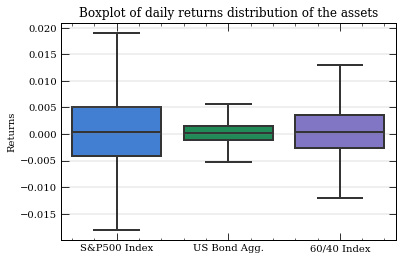

In [ ]:
# Boxplot of the returns distribution
box_plot_data = Dataset[['Change','US Bond', '60/40']]
box_plot_data.columns = ['S&P500 Index', 'US Bond Agg.', '60/40 Index']
sns.boxplot(data=box_plot_data,showfliers = False).set(title='Boxplot of daily returns distribution of the assets', ylabel="Returns")



## Part 0.B — Option Data Modeling 

In [ ]:
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import size, log, pi, sum, array, zeros, diag, mat, asarray, sqrt,copy, exp
import numpy.matlib
from scipy.stats import norm
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import minimize

In [ ]:
sp500 = df_out.dropna()
returns_sp500 = pd.DataFrame(np.log(sp500['Adj Close'].shift(1)))
returns_sp500 = returns_sp500.rename(columns={'Adj Close': 'Log_returns_SP_500'})*100

In [ ]:
# INTITIALISATION
df = np.array(returns_sp500['Log_returns_SP_500'].dropna())
r = 0.03 / 252
params = [1e-7, 0.6, 1e-6, 400, 2]

# Log-Likelihood Function
def HNGarch(params):

  # HN-Garch params:
  omega,beta,alpha,gamma,Lambda  = params
  sigma2 = np.ones(len(df))
  log_price = np.ones(len(df))
  z = np.random.randn(len(df))
  
  for i in range(0,len(df)):
      if i == 0:
        sigma2[0] = (omega + alpha) / ( 1 - alpha * gamma**2 - beta ) 
        if sigma2[0] < 0 or 1 - alpha * gamma**2 - beta < 1e-3 :
            return 1e15
      else :
          sigma2[i] = omega + beta * sigma2[i-1] + alpha * (z[i-1] - gamma * np.sqrt(sigma2[i-1]))**2
          log_price[i] = (df[i] - r - Lambda * sigma2[i])/(np.sqrt(sigma2[i]))
  score =  -0.5 * np.sum(-np.log( 2 * np.pi) - np.log(sigma2) - (log_price)**2)
  return score  

# Function Optimization(Optimal params seeking)
x0 = np.array(params)
cons = ({'type': 'ineq', 'fun': lambda x: np.array(1-x[1]-x[2]*(x[3]**2))})
bounds = [((-1,1),(0,1),(1e-3,1e-10),(0,1000),(0,5))]

sol = minimize(HNGarch,x0,bounds = bounds,constraints = cons,method = "Nelder-mead", options={"disp":False})


print('Estimated Parameters of the Heston-Nandi Model :\n')
print('Omega : ', sol.x[0])
print('Alpha : ',sol.x[2])
print('Beta : ',np.round(sol.x[1],3))
print('Gamma : ',np.round(sol.x[3],3))
print('Lambda : ',np.round(sol.x[4],3))

Estimated Parameters of the Heston-Nandi Model :

Omega :  8.212900923360275e-08
Alpha :  1.1127903056966626e-06
Beta :  0.763
Gamma :  460.027
Lambda :  1.788


In [ ]:
N=10000
T=2

Omega = sol.x[0]
Alpha = sol.x[2]
Beta = np.round(sol.x[1],3)
Gamma = np.round(sol.x[3],3)
Lambda = np.round(sol.x[4],3)



lt_vol_heston = ((Omega+Alpha) / (1 - Alpha * Gamma**2 - Beta))
returns_sum_heston=np.ones(N) * df[len(df)-1]
returns_heston = np.zeros(N)


for i in tqdm(range(0,N)):

  # Gaussian random variable
  z=np.random.randn(T) 

  # Heston Nandi Model Output Params:
  log_price = np.ones(T)*np.log(sp500['Adj Close'].loc['2021-04-29'])
  sigma2 = np.ones(T) * lt_vol_heston
  
  # Heston Nandi returns simulation 
  for t in range(1,T):

      sigma2[t] = (Omega + Beta * sigma2[t-1] + Alpha * (z[t-1] - (Gamma)*sqrt(sigma2[t-1]))**2)
      log_price[t] =  log_price[t-1] + r - sigma2[t]*Lambda + np.sqrt(sigma2[t])*z[t]
      returns_heston[t] = log_price[t] - log_price[t-1]
  
  returns_sum_heston[i]=np.sum(returns_heston)


a = []
b = []
for i in tqdm(range(0,len(sp500))):
  # Computation of the option prices
  S = sp500['Adj Close'].iloc[i]
  K = np.array([-S*0.05,-S*0.04,-S*0.03,-S*0.02,-S*0.01,S*0,S*0.01,S*0.02,S*0.03,S*0.04,S*0.05])+S

  # Empirical Martingal Simulation Duan Simonato
  returns_sum_heston=(returns_sum_heston-returns_sum_heston.mean())

  # Computation of the trajectories
  Strike_Prices = S*np.ones(N)
  Heston_Prices = S*exp(returns_sum_heston)

  # Option prices
  Strikes = np.matlib.repmat(K,len(Strike_Prices),1)

  # // Call
  Heston_Option_Prices = np.matlib.repmat(Heston_Prices,len(K),1) - Strikes.T
  Heston_Option_Prices[np.where(Heston_Option_Prices<0)] = 0 
  Heston_Calls = np.mean(Heston_Option_Prices,1)
  b.append(Heston_Calls.tolist())

  # // Put
  Heston_Option_Prices = Strikes.T - np.matlib.repmat(Heston_Prices,len(K),1)
  Heston_Option_Prices[np.where(Heston_Option_Prices < 0)] = 0 
  Heston_Puts = np.mean(Heston_Option_Prices,1)
  a.append(Heston_Puts.tolist())

100%|██████████| 5479/5479 [00:28<00:00, 191.43it/s]


In [ ]:
# Creation of the option chain for the prices: and 1 day maturity:
Strike_str = ['-5%','-4%','-3%','-2%','-1%','0%','1%','2%','3%','4%','5%']
Option_Chain = pd.DataFrame(a, columns = Strike_str, index = sp500.index)
Option_Chain.to_excel("option_chain.xlsx")

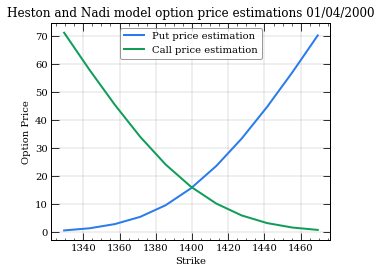

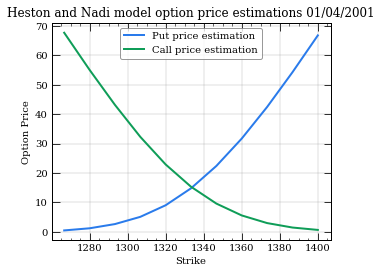

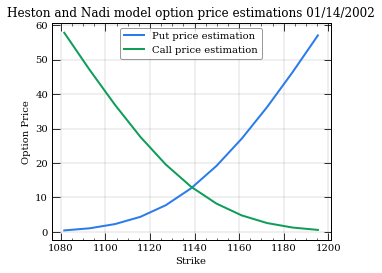

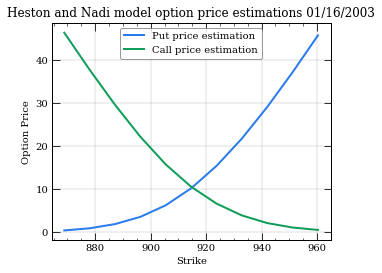

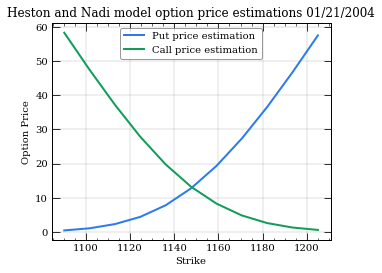

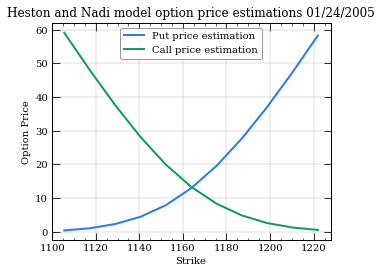

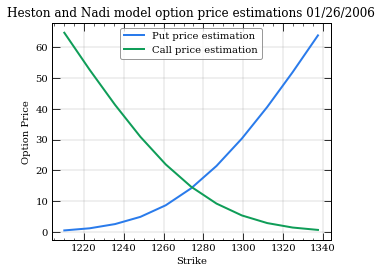

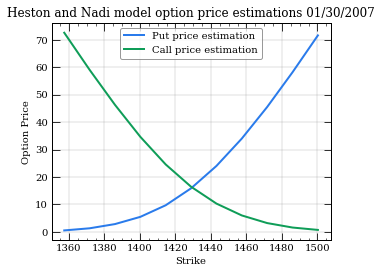

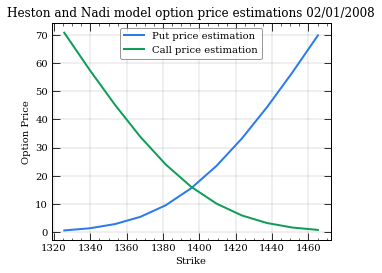

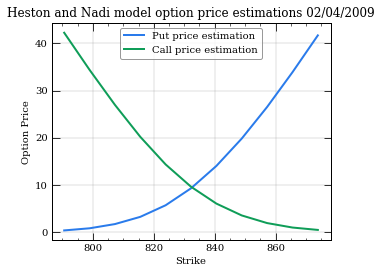

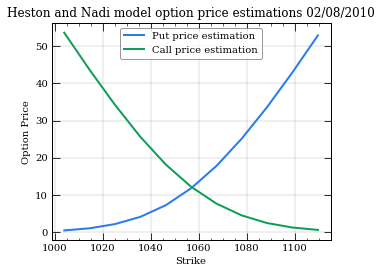

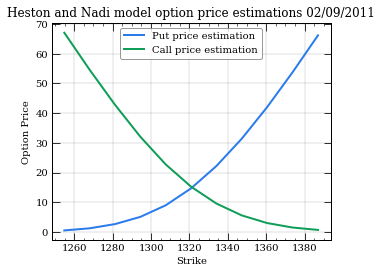

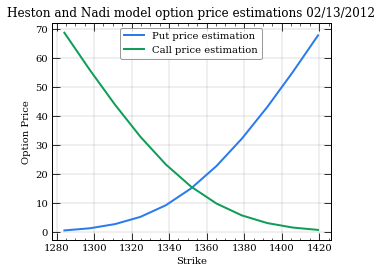

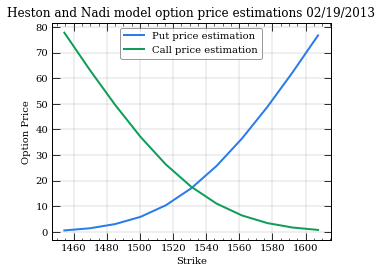

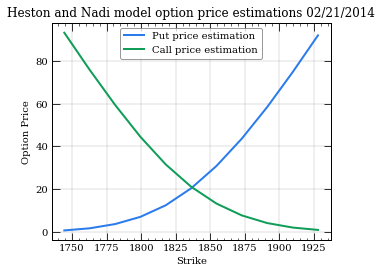

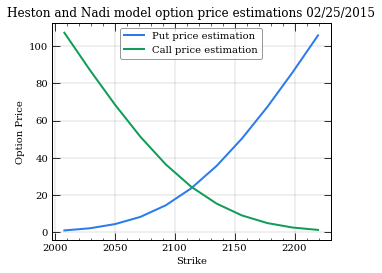

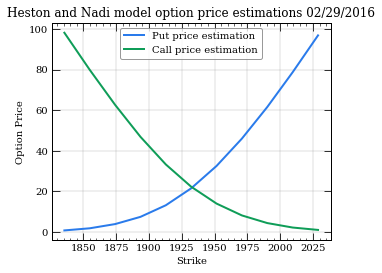

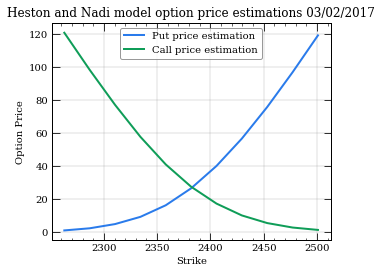

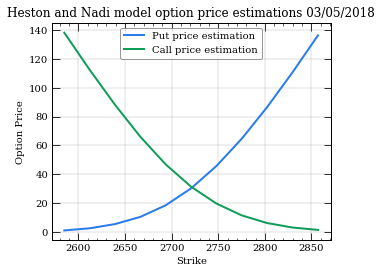

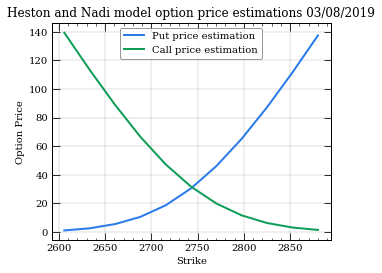

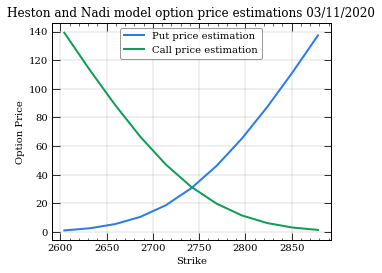

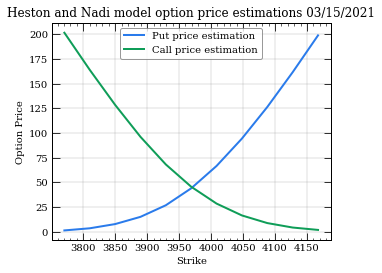

In [ ]:
for i in range(22):
  S = sp500['Adj Close'].iloc[i*252]
  K = np.array([-S*0.05,-S*0.04,-S*0.03,-S*0.02,-S*0.01,S*0,S*0.01,S*0.02,S*0.03,S*0.04,S*0.05])+S
  plt.figure(figsize=(5,4))
  plt.plot(K,np.array(a[i*252][:]))
  plt.plot(K,np.array(b[i*252][:]))
  plt.title('Heston and Nadi model option price estimations '+ sp500.index[i*252].strftime('%m/%d/%Y'))
  plt.xlabel('Strike')
  plt.ylabel('Option Price')
  plt.legend(['Put price estimation', 'Call price estimation'])
  plt.show()

100%|██████████| 11/11 [00:03<00:00,  3.36it/s]


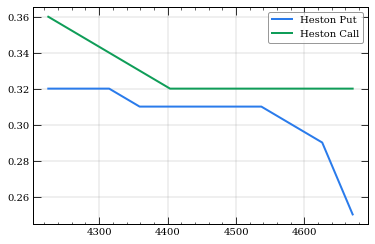

In [ ]:
# Black Scholes Formula

def BS_pricing(sigma,S,K,r,T,Call):
    d1=(log(S/K)+(r+0.5*(sigma**2))*T)/(sigma*(T**.5))
    d2=d1-sigma*sqrt(T)
    if Call == True:
      O= S*norm.cdf(d1) - K*exp(-r*T)*norm.cdf(d2)
    else:
      O = K*exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return O

def IV_search(S,K,r,T,C,Call):

    IV = np.linspace(0,15,1500)
    err = np.ones(len(IV))

    for i in range(0,len(err)):
      err[i] = np.abs((C - BS_pricing(IV[i],S,K,r,T,Call)))
    IV_opt = IV[np.where(err == min(err))]

    if len(IV_opt)>1:
      IV_opt = IV_opt[len(IV_opt)-1]
    return np.array(IV_opt)

# Implied Volatilities Computations
IV_Heston_Call = np.zeros(len(Heston_Option_Prices))
IV_Heston_Put = np.zeros(len(Heston_Option_Prices))

for i in tqdm(range(0,len(Heston_Option_Prices))):
  S = sp500['Adj Close'].iloc[5400]
  K = np.array([-S*0.05,-S*0.04,-S*0.03,-S*0.02,-S*0.01,S*0,S*0.01,S*0.02,S*0.03,S*0.04,S*0.05])+S
  IV_Heston_Call[i]=IV_search(S,K[i],r*252,T/252,b[5400][i],True) 


for i in tqdm(range(0,len(Heston_Option_Prices))):
  S = sp500['Adj Close'].iloc[5400]
  K = np.array([-S*0.05,-S*0.04,-S*0.03,-S*0.02,-S*0.01,S*0,S*0.01,S*0.02,S*0.03,S*0.04,S*0.05])+S
  IV_Heston_Put[i]=IV_search(S,K[i],r*252,T/252,a[5400][i],False) 
    
plt.plot(K,IV_Heston_Put)
plt.plot(K,IV_Heston_Call)
plt.legend(['Heston Put', 'Heston Call'])

# Part 1.A — Technical indicator trading  

## Statistical significance

In [ ]:
def T_test(benchmark, strategy, indicator, params, multiple_factor):

  '''
  benchmark: input value of the returns sample corresponding to the buy and hold benchmark
  strategy: input value of the returns sample corresponding to the strategy
  '''
  from scipy.stats import t
  
  # Variable setup
  n = len(benchmark)
  X = strategy - benchmark
  X_std_error = X.std() / np.sqrt(n-1) 


  # Sharpe T-Stat
  sharpe = (strategy.mean()/strategy.std()) * np.sqrt(252)
  t_stat = sharpe * np.sqrt(n/252)
  pval = 2*(1 - t.cdf(abs(t_stat), n-1)) * multiple_factor
  
  # Highlight significant values with sharpe t-stat found previously

  # P-value 
  if pval <= 0.05:
    colp = '\33[32m'
  elif pval <= 0.10:
    colp = '\33[33m'
  else:
    colp = '\33[31m'

  # T-stat
  if t_stat <= 0:
    colt = '\33[31m'
  else:
    colt = '\33[32m'

  return print("Indicator: ",indicator, str(params),'\t' ,"|", 
               '\t', 'Sharpe ratio: ', round(sharpe,4),
               '\t', "t_stat: " + colt , round(t_stat,4), 
               '\t' + '\33[37m', "p-value: " + colp , round(pval,4), '\33[37m')

When returns are realized at higher frequencies, Sharpe
ratios and the corresponding t-statistics can be calculated in a
straightforward way. Assuming that there are N return realizations in a year and the mean and standard deviation of returns
at the higher frequency is μ and σ, the annualized Sharpe ratio
can be calculated as ( )/( μ× σ× N N ) = (μ/σ) × N . The
corresponding t-statistic is (μ/σ) × N ×Numberof Years.
For example, for monthly returns, the annualized Sharpe
ratio and the corresponding t-statistic are ( ) μ×σ × 12 and
(/) μσ × 12 Numberof years × , respectively, where μ and σ
are the monthly mean and standard deviation for returns.
Similarly, assuming μ and σ are the daily mean and standard
deviation for returns and there are 252 trading days in a year,
the annualized Sharpe ratio and the corresponding t-statistics
are (μ/σ) × 252 and (μ/σ) × 252 Number of years × .

## MACD

In [ ]:
# MACD indicator function 

def MACD(df,parameter_1,paramter_2, result = False):

  '''
  df: corresponds to the dataframe containing assets data 
  parameter_1: corresponds to the small window for EMA computation
  parameter_1: corresponds to the large window for EMA computation
  result: is a boolean allowing to return the dataframe of the strategy creation
  '''


  #_____________________________________________________________________________
  #          MACD formula implementation
  #_____________________________________________________________________________

  # MACD construction
  df['EWMA_small'] = df['Adj Close'].ewm(parameter_1).mean().shift(1).dropna()
  df['EWMA_large'] = df['Adj Close'].ewm(paramter_2).mean().shift(1).dropna()
  df['MACD'] = df['EWMA_small']- df['EWMA_large']

  # Adjusted MACD  
  df['vol_price'] = df['Adj Close'].rolling(63).std().shift(1)
  df['q'] = df['MACD'] / df['vol_price']
  df['q_vol'] = df['q'].rolling(252).std()
  df['Trend'] = df['q']/(df['q_vol'])

  # Signal creation 
  df['position_sizing'] = (df['Trend'] * np.exp((-df['Trend']**2)/4))/0.89
  df['Signal'] = np.nan
  df['Signal'].loc[df['position_sizing'] < 0] = 0
  df['Signal'].loc[df['position_sizing'] > 0] = 1


  #_____________________________________________________________________________
  #          Inclusion of the cost 
  #_____________________________________________________________________________

  # Signal and cost list
  signal_list = np.array(df['Signal']).tolist()
  cost = []

  # Cost inclusion
  for i in range(1,len(df)):
    if (signal_list[i] == 0) and (signal_list[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  df['Cost'] = pd.DataFrame(np.array(cost), index = df.index)


  #_____________________________________________________________________________
  #          Strategy's results
  #_____________________________________________________________________________

  # Strategy
  df['Strategy'] = (df['Signal'] * df['Change']) + df['Cost']

  # Results format
  if result == True:
    return pd.concat((df['Trend'],df['Signal'],df['Strategy']), axis  = 1)
  else:
    z = ''


In [ ]:
# In sample dataframe
in_sample = (Dataset.index > '1960-01-01') & (Dataset.index <= '2000-01-01')
df = Dataset.loc[in_sample]

In [ ]:
# Preprocessing of the params analysis 

# Prepare performance analysis of in-sample
x = [(i+5)*2 for i in range(56)]
y = [(i+5)*2 for i in range(56)]
performance = np.zeros((len(x),len(y)))

# Running of performance analysis
for i in tqdm(range(len(x))):
  for j in range(len(y)):

    # Indicator 
    MACD(df,x[i],x[j], True)

    # Fill the performance matrix with t-stat
    sharpe = (df['Strategy'].mean()/df['Strategy'].std()) * np.sqrt(252)
    performance[i][j] = np.round(sharpe,3)

100%|██████████| 56/56 [00:57<00:00,  1.03s/it]


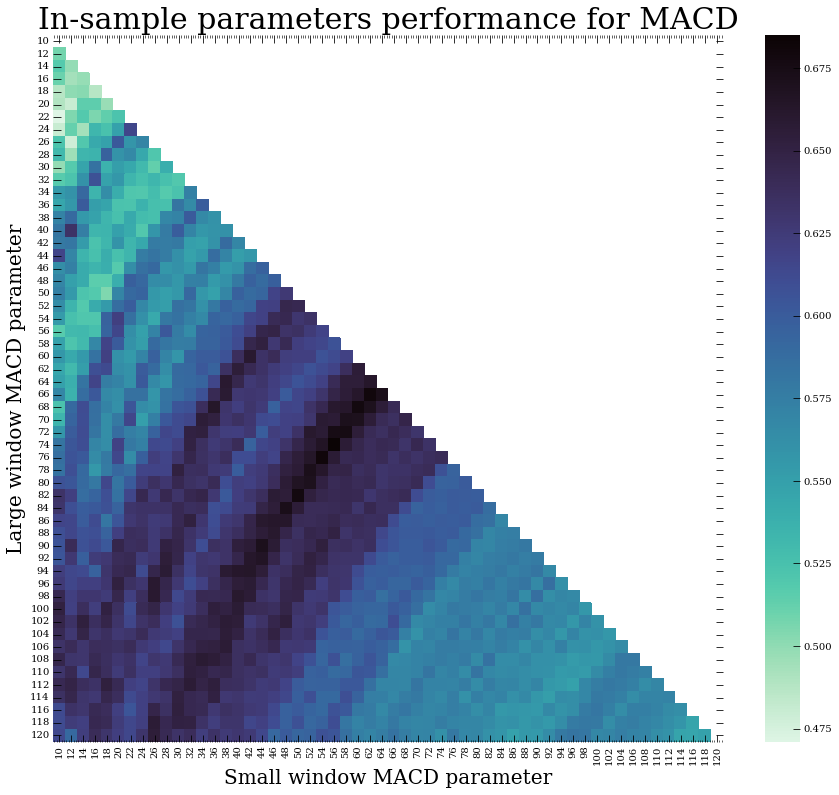

Best small params :  56
Best large params :  74


In [ ]:
# Construction of performance heatmap depending on params analysis

# Structure performance data
performance = np.triu(performance)
performance = performance.astype('float')
performance[performance == 0] = 'nan'

# Maximum value positions 
best_small_position = (np.where(performance == np.amax(np.nan_to_num(performance)))[0]).tolist()[0]
best_small = x[best_small_position]        
best_large_position = (np.where(performance == np.amax(np.nan_to_num(performance)))[1]).tolist()[0]
best_large = y[best_large_position]

# Creation of the Heatmap 
fig, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap((performance.transpose()), annot=False, xticklabels=x, yticklabels=y, cmap='mako_r')
plt.title('In-sample parameters performance for MACD', fontsize=30)
plt.xlabel('Small window MACD parameter', fontsize=20)
plt.ylabel('Large window MACD parameter', fontsize=20)
plt.show()

# Print best params location
print('Best small params : ', best_small)
print('Best large params : ', best_large)

In [ ]:
perf_MACD = pd.DataFrame(performance)
perf_MACD.to_excel('/content/perf_macd.xlsx')

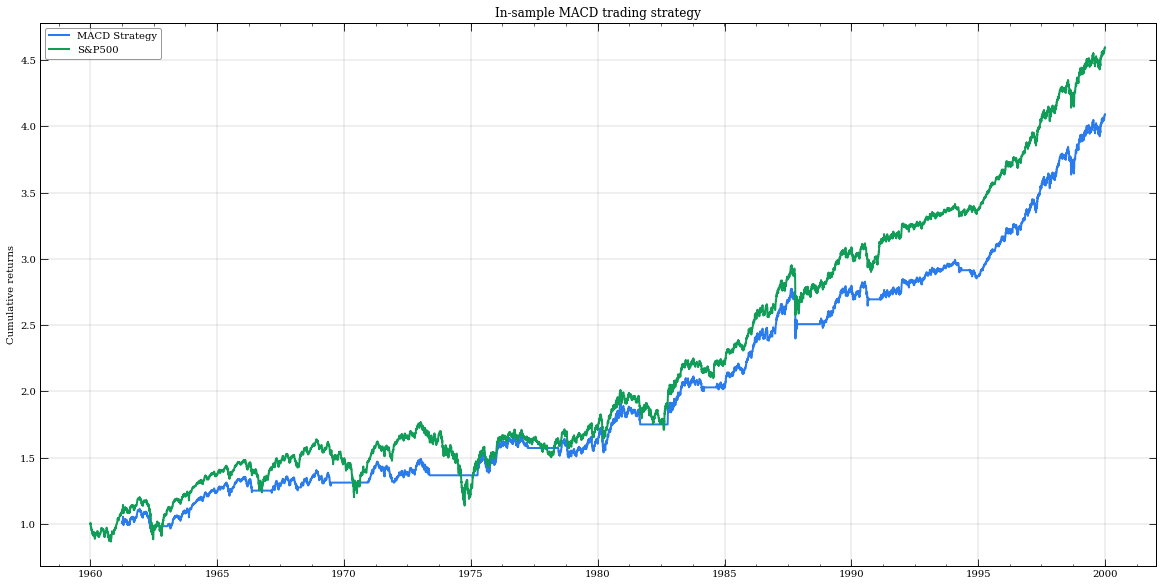

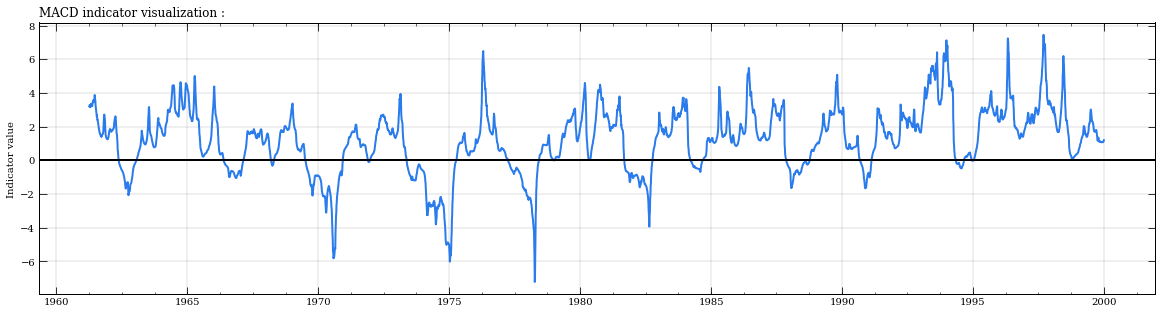

Indicator:  MACD (56, 74) 	 | 	 Sharpe ratio:  0.6852 	 t_stat:  4.3316 	 p-value:  0.0913 


In [ ]:
# MACD in-sample performance:
MACD(df,best_small,best_large, True)

# Visualization of MACD strategy

# Benchmark versus MACD indicator 
plt.figure(figsize = (20,10))
plt.plot((df['Strategy'].cumsum())+1)
plt.plot((df['Change'].cumsum())+1)
plt.title('In-sample MACD trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['MACD Strategy', 'S&P500',])
plt.show()

# MACD indicator visualization
plt.figure(figsize = (20,5))
plt.title('MACD indicator visualization :', loc = 'left')
plt.plot(df['Trend'])
plt.ylabel('Indicator value')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

# T-stat and p-value associated to MACD
T_test(df['Change'],df['Strategy'],'MACD',(best_small,best_large),110*111/2)

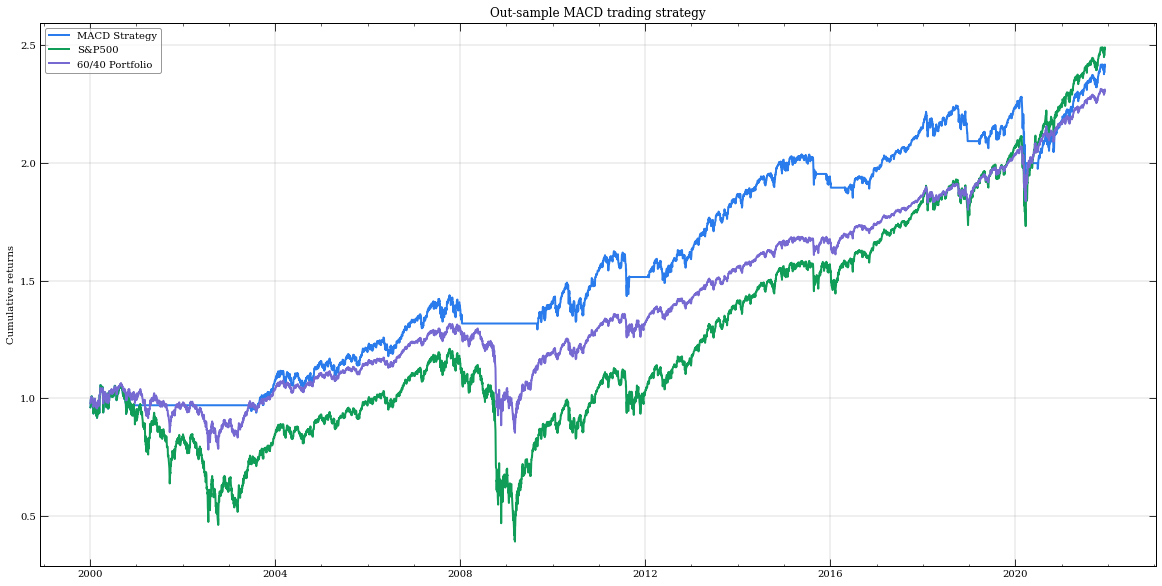

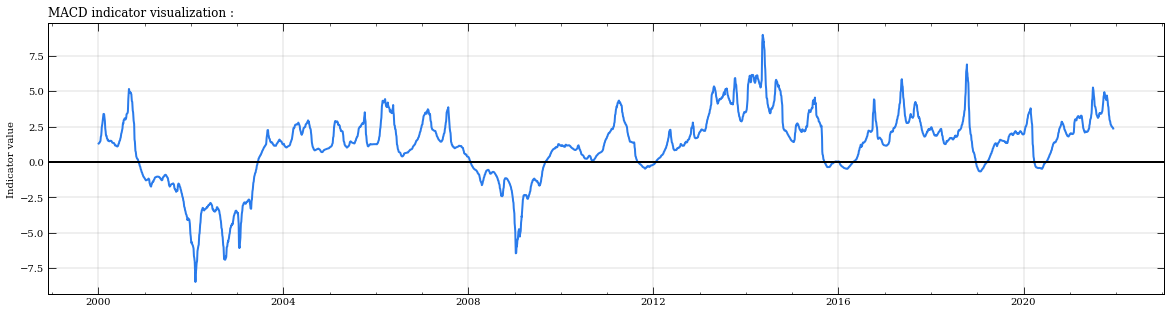

Indicator:  MACD (56, 74) 	 | 	 Sharpe ratio:  0.4817 	 t_stat:  2.2461 	 p-value:  0.0247 


In [ ]:
# Out-sample performance and visualization: 

# Data preparation 

# Out-sample dataframe:
out_sample = (Dataset.index > '1998-01-01') & (Dataset.index <= '2022-01-01')
df = Dataset.loc[out_sample]

# Running the strategy 
MACD(df,best_small,best_large, True)
df = df.dropna()


# Visualisation of the MACD strategy

# Plot the strategy and benchmark
plt.figure(figsize = (20,10))
plt.plot((df['Strategy'].cumsum())+1)
plt.plot((df['Change'].cumsum())+1)
plt.title('Out-sample MACD trading strategy')
plt.plot(df['60/40'].cumsum()+1)
plt.ylabel('Cumulative returns')
plt.legend(['MACD Strategy', 'S&P500','60/40 Portfolio'])
plt.show()

# MACD indicator visualization
plt.figure(figsize = (20,5))
plt.title('MACD indicator visualization :', loc = 'left')
plt.plot(df['Trend'])
plt.ylabel('Indicator value')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

# T-stat and p-value associated to MACD
T_test(df['Change'],df['Strategy'],'MACD',(best_small,best_large),1)

## EVM

In [ ]:
def EVM(df,parameter,result = False):

  '''
  df: corresponds to the dataframe containing assets data 
  parameter: corresponds to the rolling window for EMA computation
  result: is a boolean allowing to return the dataframe of the strategy creation
  '''


  #_____________________________________________________________________________
  #          EMV formula implementation
  #_____________________________________________________________________________

  # EMV construction 
  distance_moved = ((df['High'].shift(1) + df['Low'].shift(1))/2) - ((df['High'].shift(2) + df['Low'].shift(2))/2)
  box_ratio = (df['Volume'].shift(1) / 10000000) / ((df['High'].shift(1) - df['Low'].shift(1)))
  EVM = distance_moved / box_ratio 
  df['EVM'] = EVM.rolling(parameter).mean()
  df['Signal'] = np.nan

  # Signal creation
  df['Signal'].loc[df['EVM'] <= -1] = 0
  df['Signal'].loc[df['EVM'] > -1] = 1


  #_____________________________________________________________________________
  #          Inclusion of the cost 
  #_____________________________________________________________________________

  # Signal and cost list
  signal_list = np.array(df['Signal']).tolist()
  cost = []

  # Cost inclusion
  for i in range(1,len(df)):
    if (signal_list[i] == 0) and (signal_list[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  df['Cost'] = pd.DataFrame(np.array(cost), index = df.index)


  #_____________________________________________________________________________
  #          Strategy's results
  #_____________________________________________________________________________

  # Strategy
  df['Strategy'] = (df['Signal'] * df['Change']) + df['Cost']

  # Results format
  if result == True:
    return pd.concat((df['EVM'],df['Signal'],df['Strategy']), axis  = 1)
  else:
    z = ''

In [ ]:
# In sample dataframe:
in_sample = (Dataset.index > '1960-01-01') & (Dataset.index <= '2000-01-01')
df = Dataset.loc[in_sample]

In [ ]:
# Preprocessing of the params analysis 

# Prepare performance analysis of in-sample
x = [i for i in range(10,121)] 
y = ['']
performance = np.zeros((len(x),len(y)))

# Running of performance analysis
for i in tqdm(x):

  # Indicator 
  EVM(df,i)

  # Fill the performance matrix with t-stat
  sharpe = (df['Strategy'].mean()/df['Strategy'].std()) * np.sqrt(252)
  performance[i-10][0] = np.round(sharpe,3)


100%|██████████| 111/111 [00:00<00:00, 115.16it/s]


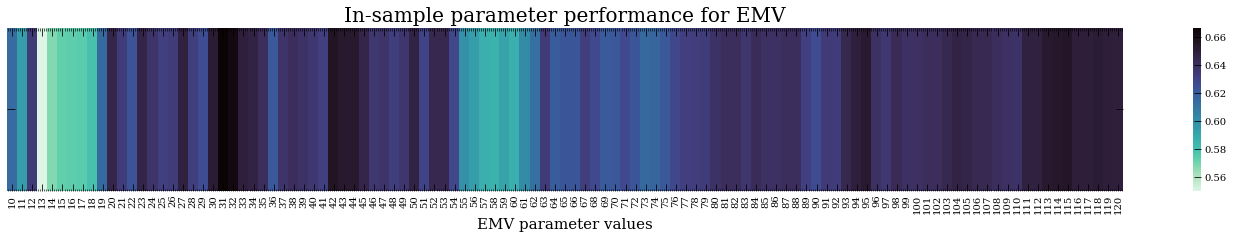

Best params :  31


In [ ]:
# Construction of performance heatmap depending on params analysis

# Maximum value positions 
best_param_position = (np.where(performance == np.max(performance))[0]).tolist()[0]
best_param_emv = x[best_param_position]


# Creation of the Heatmap 
fig, ax = plt.subplots(figsize=(25, 3))
ax = sns.heatmap((performance.transpose()), annot=False, xticklabels=x, yticklabels=y, cmap='mako_r')
plt.title('In-sample parameter performance for EMV', fontsize=20)
plt.xlabel('EMV parameter values', fontsize=15)
plt.show()

# Print best param location
print('Best params : ', best_param_emv)

In [ ]:
perf_EMV = pd.DataFrame(performance)
perf_EMV.to_excel('/content/perf_emv.xlsx')

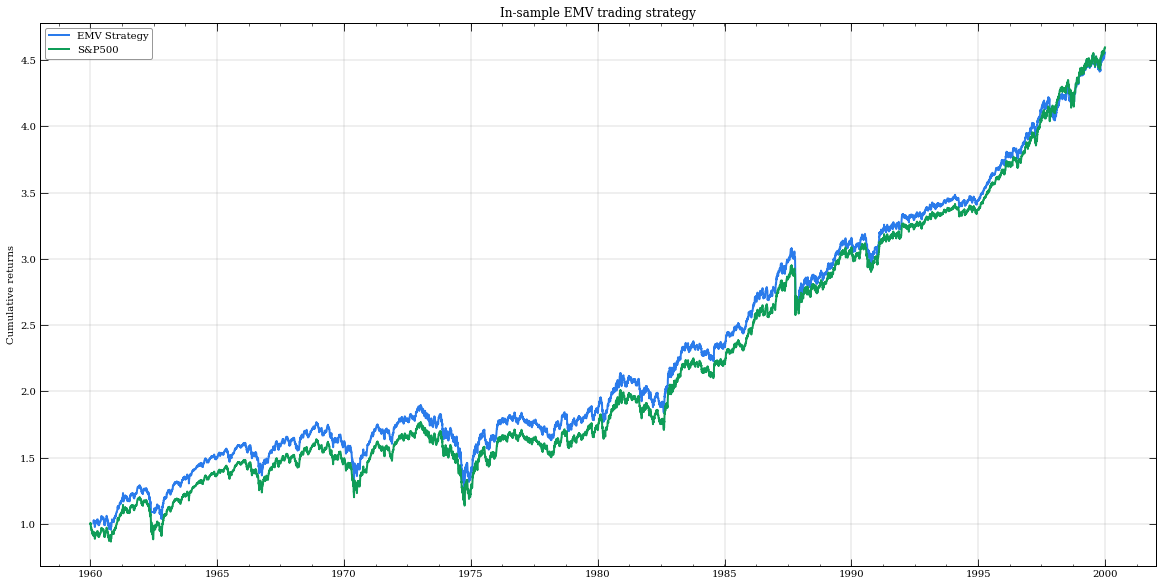

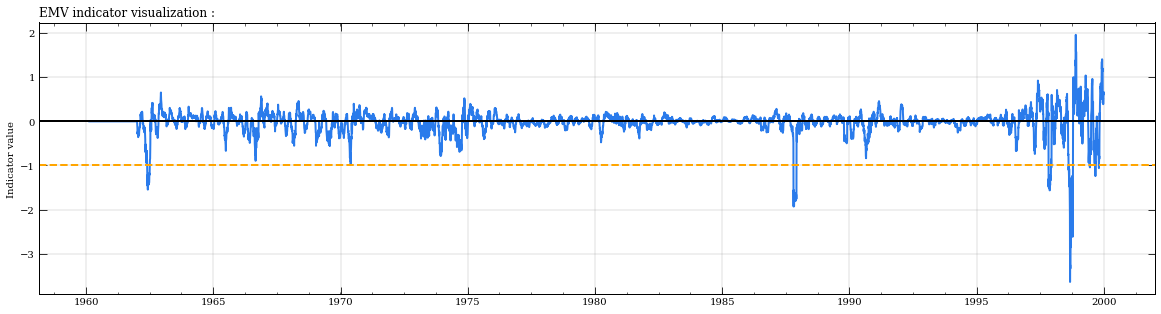

Indicator:  EMV 31 	 | 	 Sharpe ratio:  0.6673 	 t_stat:  4.2188 	 p-value:  0.0028 


In [ ]:
# EMV in-sample performance:
EVM(df,best_param_emv, True)


# Visualization of EMV strategy

# Benchmark versus EMV indicator 
plt.figure(figsize = (20,10))
plt.plot((df['Strategy'].cumsum())+1)
plt.plot((df['Change'].cumsum())+1)
plt.title('In-sample EMV trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['EMV Strategy', 'S&P500',])
plt.show()

# EMV indicator visualization
plt.figure(figsize = (20,5))
plt.title('EMV indicator visualization :', loc = 'left')
plt.plot(df['EVM'])
plt.ylabel('Indicator value')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=-1, color='orange', linestyle='--')
plt.show()

# T-stat and p-value associated to EMV
T_test(df['Change'],df['Strategy'],'EMV',(best_param_emv),len(x))

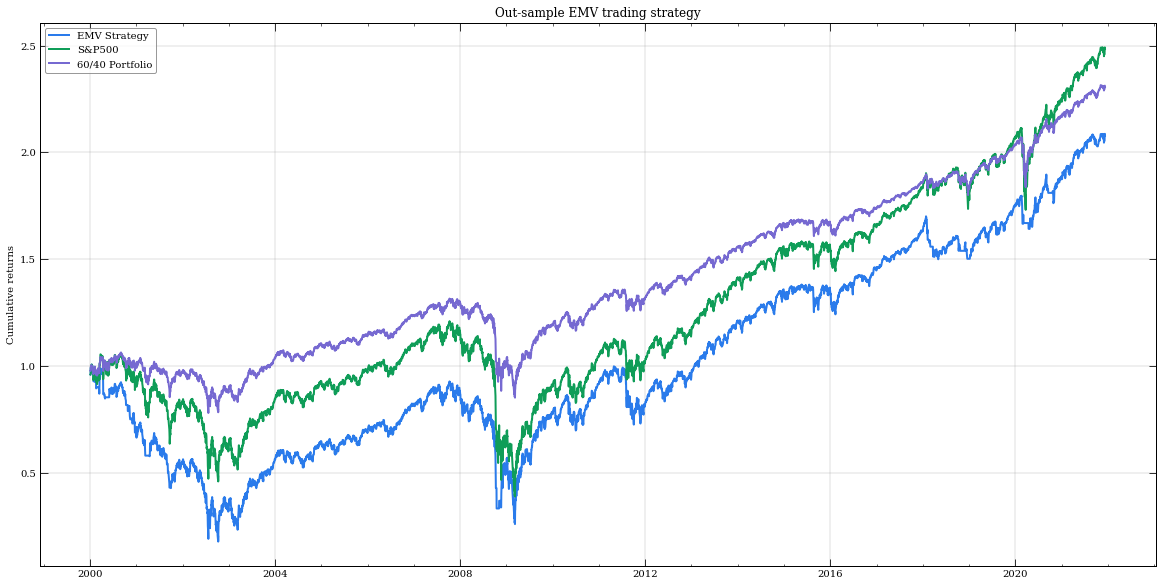

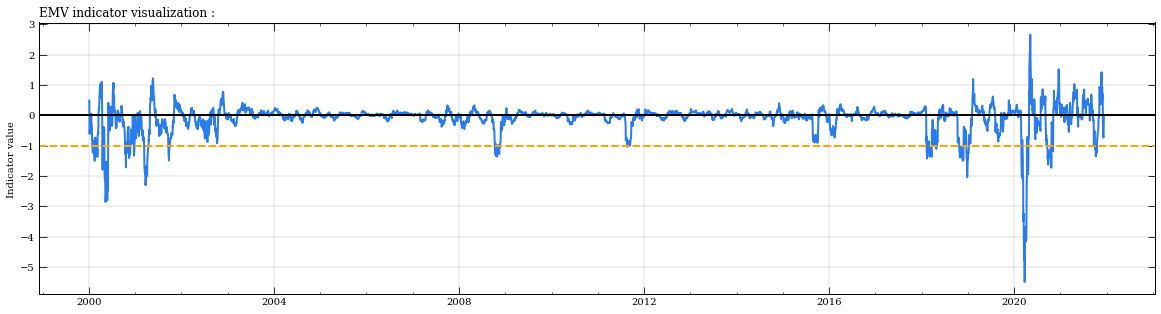

Indicator:  EMV 31 	 | 	 Sharpe ratio:  0.2864 	 t_stat:  1.3352 	 p-value:  0.1819 


In [ ]:
# Out-sample test and visualization: 

# Data preparation 

# Out-sample dataframe:
out_sample = (Dataset.index > '1998-01-01') & (Dataset.index <= '2022-01-01')
df = Dataset.loc[out_sample]

# Running the strategy
EVM(df,best_param_emv)
df = df.dropna()


# Visualisation of the EMV strategy

# Plot the strategy and benchmark
plt.figure(figsize = (20,10))
plt.plot((df['Strategy'].cumsum())+1)
plt.plot((df['Change'].cumsum())+1)
plt.ylabel('Cumulative returns')
plt.title('Out-sample EMV trading strategy')
plt.plot(Dataset['60/40'].cumsum()+1)
plt.legend(['EMV Strategy', 'S&P500','60/40 Portfolio'])
plt.show()

# EMV indicator visualization
plt.figure(figsize = (20,5))
plt.title('EMV indicator visualization :', loc = 'left')
plt.plot(df['EVM'])
plt.ylabel('Indicator value')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=-1, color='orange', linestyle='--')
plt.show()

# T-stat and p-value associated to EMV
T_test(df['Change'],df['Strategy'],'EMV',(best_param_emv),1)

## RSI

In [ ]:
# RSI indicator function
def RSI(df,parameter,result = False):

  '''
  df: corresponds to the dataframe containing assets data 
  parameter: corresponds to the rolling window for EMA computation
  result: is a boolean allowing to return the dataframe of the strategy creation
  '''


  #_____________________________________________________________________________
  #          RSI formula implementation
  #_____________________________________________________________________________

  # RSI indicator construction
  df['Diff'] = df['Adj Close'].diff()
  df['Up'], df['Down'] = np.zeros(len(df)), np.zeros(len(df))
  df['Up'].loc[df['Diff'] >= 0] = df['Diff']
  df['Down'].loc[df['Diff'] < 0] = df['Diff']
  df['U'] = df['Up'].ewm(parameter).mean().shift(1).dropna()
  df['D'] = abs(df['Down'].ewm(parameter).mean().shift(1).dropna())
  df['RSI'] = 100 - 100/(1+(df['U'] / df['D']))

  # Signal creation 
  df['Signal'] = np.zeros(len(df)) 
  df['Signal'].loc[(df['RSI'] > 50) & (df['RSI'] < 70)] = 1

  a,b = 30,70
  list_signal = np.array(df['Signal']).tolist()
  list_RSI  = np.array(df['RSI']).tolist()

  for h in range(len(df['RSI'])):
    # Buy after oversell
    if list_RSI[h] <= a:
      list_signal[h] = 1
      a,b = 50,70
    else:
      a = 30
    # Block buy after overbought)
    if list_RSI[h] >= b:
      list_signal[h] = 0
      b,a = 50,30
    else:
      b = 70


  #_____________________________________________________________________________
  #          Inclusion of the cost 
  #_____________________________________________________________________________

  # Signal and cost list
  df['Signal'] = pd.DataFrame(np.array(list_signal), index = df.index)
  signal_list = np.array(df['Signal']).tolist()
  cost = []

  # Cost inclusion
  for i in range(1,len(df)):
    if (signal_list[i] == 0) and (signal_list[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  df['Cost'] = pd.DataFrame(np.array(cost), index = df.index)


  #_____________________________________________________________________________
  #          Strategy's results
  #_____________________________________________________________________________

  # Strategy
  df['Strategy'] = df['Signal'] * df ['Change'] + df['Cost']

  # Results format
  if result == True:
    return pd.concat((df['RSI'],df['Signal'],df['Strategy']), axis  = 1)
  else:
    z = ''

In [ ]:
# In sample dataframe:
in_sample = (Dataset.index > '1960-01-01') & (Dataset.index <= '2000-01-01')
df = Dataset.loc[in_sample]

In [ ]:
# Preprocessing of the params analysis

# Prepare performance analysis of in-sample
x = [i for i in range(10,121)]
y = ['']
performance = np.zeros((len(x),len(y)))

# Running of performance analysis
for i in tqdm(range(len(x))):

  # Indicator
  RSI(df,x[i])

  # Fill the performance matrix with t-stat
  sharpe = (df['Strategy'].mean()/df['Strategy'].std()) * np.sqrt(252)
  performance[i][0] = np.round(sharpe,3)

100%|██████████| 111/111 [00:02<00:00, 52.30it/s]


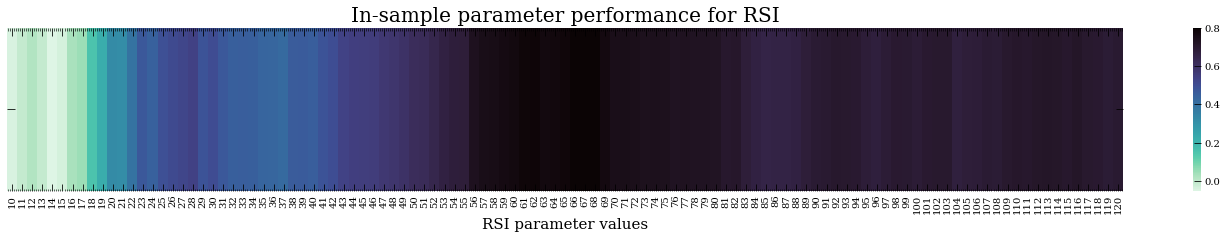

Best small params :  67


In [ ]:
# Construction of performance heatmap depending on param analysis:

# Maximum value positions 
best_param_position = (np.where(performance == np.amax(np.nan_to_num(performance)))[0]).tolist()[0]
best_param_rsi = x[best_param_position]

# Creation of the Heatmap 
fig, ax = plt.subplots(figsize=(25, 3))
ax = sns.heatmap((performance.transpose()), annot=False, xticklabels=x, yticklabels=y, cmap='mako_r')
plt.title('In-sample parameter performance for RSI', fontsize=20)
plt.xlabel('RSI parameter values', fontsize=15)
plt.show()

# Print best params location
print('Best small params : ', best_param_rsi)

In [ ]:
perf_EMV = pd.DataFrame(performance)
perf_EMV.to_excel('/content/perf_rsi.xlsx')

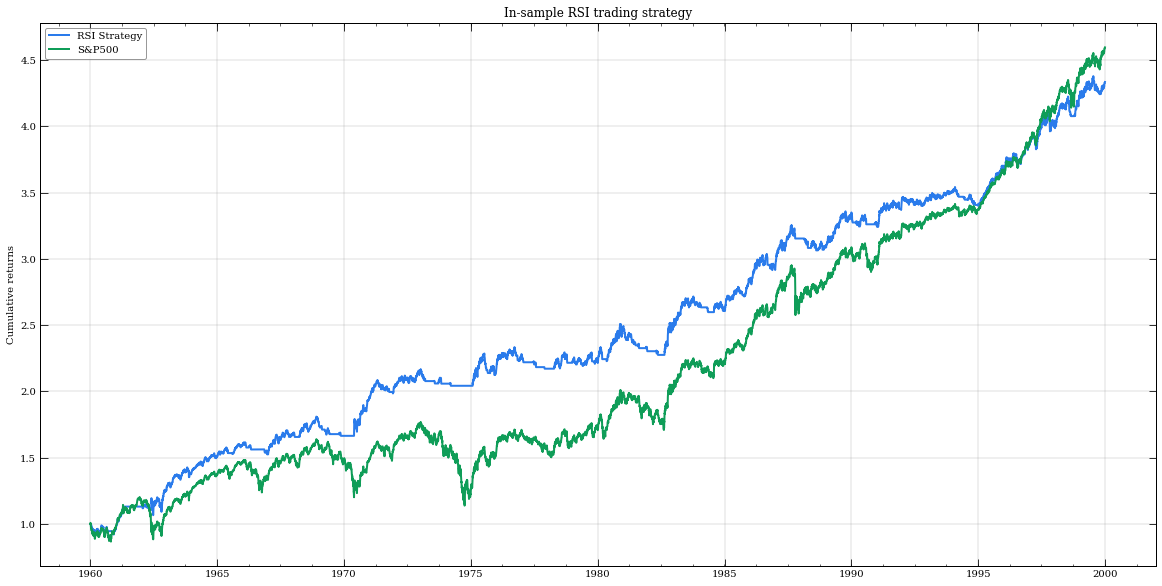

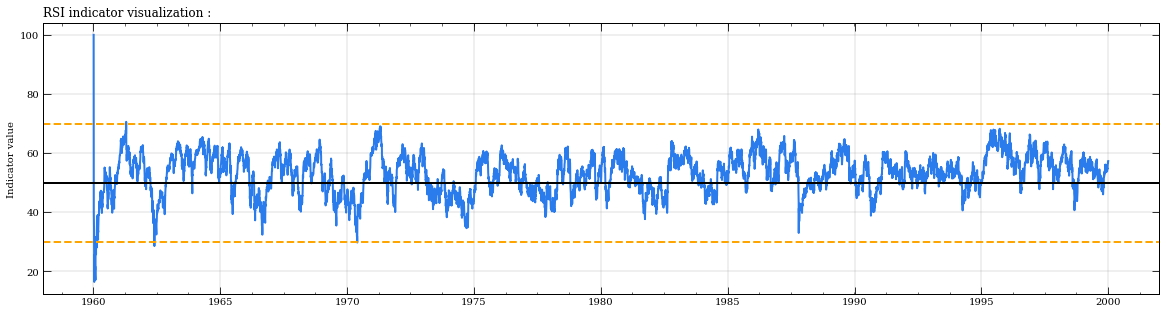

Indicator:  RSI 67 	 | 	 Sharpe ratio:  0.8001 	 t_stat:  5.0583 	 p-value:  0.0 


In [ ]:
# RSI in-sample performance
RSI(df,best_param_rsi)


# Visualization of RSI strategy

# Plot the strategy and benchmark
plt.figure(figsize = (20,10))
plt.plot((df['Strategy'].cumsum())+1)
plt.plot((df['Change'].cumsum())+1)
plt.title('In-sample RSI trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['RSI Strategy', 'S&P500',])
plt.show()

# Plot RSI indicator 
plt.figure(figsize=(20,5))
plt.plot(df['RSI'])
plt.title('RSI indicator visualization :', loc = 'left')
plt.ylabel('Indicator value')
plt.axhline(y=30, color='orange', linestyle='--')
plt.axhline(y=70, color='orange', linestyle='--')
plt.axhline(y=50, color='black', linestyle='-', linewidth = 2)
plt.show()

# T-stat and p-value associated to RSI
T_test(df['Change'],df['Strategy'],'RSI',(best_param_rsi),len(x))

***Out-sample RSI implementation***

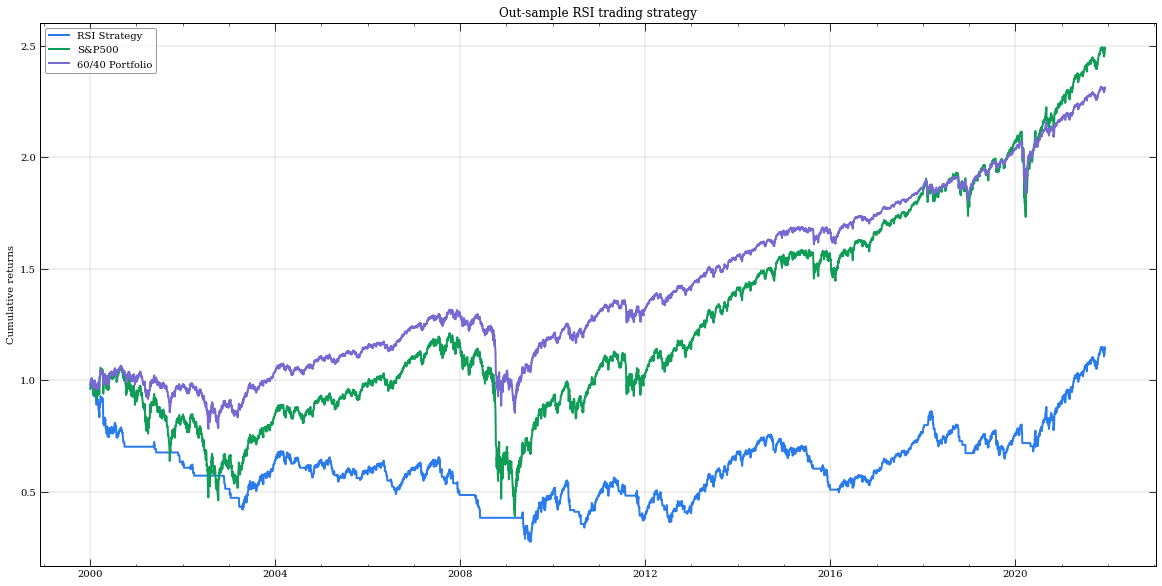

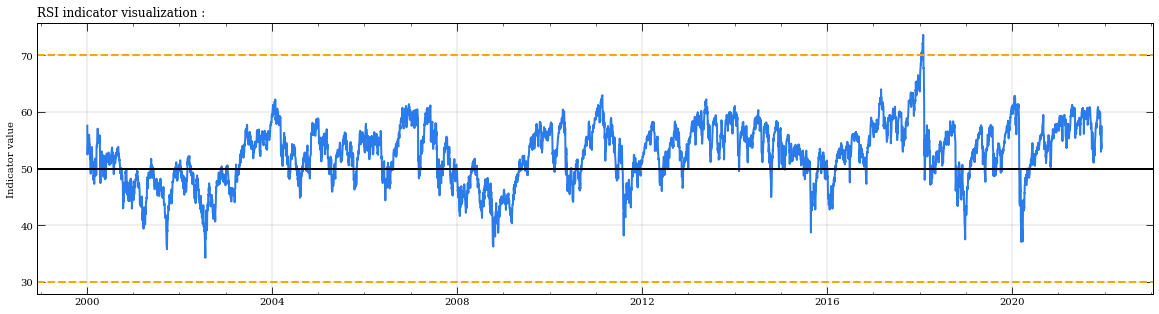

Indicator:  RSI 67 	 | 	 Sharpe ratio:  0.0568 	 t_stat:  0.2648 	 p-value:  0.7912 


In [ ]:
# Out-sample test and visualization: 

# Data preparation 

# Out Sample dataframe: 
out_sample = (Dataset.index > '1998-01-01') & (Dataset.index <= '2022-01-01')
df = Dataset.loc[out_sample]

# Running the strategy
RSI(df,best_param_rsi,True)
df = df.dropna()

# Visualisation of the RSI strategy

# Plot the strategy and benchmark
plt.figure(figsize = (20,10))
plt.plot((df['Strategy'].cumsum())+1)
plt.plot((df['Change'].cumsum())+1)
plt.plot(df['60/40'].cumsum()+1)
plt.ylabel('Cumulative returns')
plt.title('Out-sample RSI trading strategy')
plt.legend(['RSI Strategy', 'S&P500','60/40 Portfolio'])
plt.show()

# RSI indicator visualization
plt.figure(figsize=(20,5))
plt.plot(df['RSI'])
plt.title('RSI indicator visualization :', loc = 'left')
plt.ylabel('Indicator value')
plt.axhline(y=30, color='orange', linestyle='--')
plt.axhline(y=70, color='orange', linestyle='--')
plt.axhline(y=50, color='black', linestyle='-', linewidth = 2)
plt.show()

# T-stat and p-value associated to RSI
T_test(df['Change'],df['Strategy'],'RSI',(best_param_rsi),1)

# Part 1.B — Machine learning and Deep learning trading models  

## Support vector regression

In [ ]:
# Libraries 
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
# Dataframe preparation
df = Dataset

# indicator preparation
macd = MACD(df,56,74,True)
rsi = RSI(df,67,True).dropna()
evm = EVM(df,31,True).dropna()

indicator = pd.concat([macd['Trend'],rsi['RSI'],evm['EVM']],axis =1).dropna()
svm_dataset = pd.concat([indicator,Dataset['Change']], axis = 1).dropna()


In [ ]:
# Data cleaning
split = len(svm_dataset.loc[(svm_dataset.index <'2000-01-01')])
input = ["Trend",'RSI','EVM']

# Raw dataset
X_train = svm_dataset[input].iloc[:split]
X_test = svm_dataset[input].iloc[split:]
y_train = np.round(svm_dataset[['Change']].iloc[:split]+0.5)
y_train['Change'].loc[y_train['Change'] == 0] = -1
y_test = np.round(svm_dataset[["Change"]].iloc[split:]+0.5)

# Data Standardization
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X = rc.transform(svm_dataset[input])
X_test = rc.transform(X_test)

In [ ]:
# Machine learning and grid search

# Initialize the class
svr = SVR()

# Hyperparameter optimization 
param = {'C': [1, 10,100], 'kernel':['rbf','sigmoid',], 'epsilon':[0.001,0.01,0.1]}

# Create the model
model = GridSearchCV(svr, param_grid=param, scoring='r2', cv=10, verbose = 4)

# Fit the model
model.fit(X_train, y_train)
svr = model.best_estimator_
svr.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.631 total time=   5.4s
[CV 2/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.625 total time=   6.2s
[CV 3/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.496 total time=   5.3s
[CV 4/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.646 total time=   5.3s
[CV 5/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.574 total time=   5.3s
[CV 6/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.720 total time=   5.3s
[CV 7/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.647 total time=   5.2s
[CV 8/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.659 total time=   5.3s
[CV 9/10] END ..C=1, epsilon=0.001, kernel=rbf;, score=-0.661 total time=   5.2s
[CV 10/10] END .C=1, epsilon=0.001, kernel=rbf;, score=-0.596 total time=   5.2s
[CV 1/10] END C=1, epsilon=0.001, kernel=sigmoid;, score=-200874.728 total time=   5.3s
[CV 2/10] END C=1, epsilon=0.001, kerne

SVR(C=1)

In [ ]:
print('best params: {C: 1, epsilon: 0.1, kernel: rbf}')

best params: {C: 1, epsilon: 0.1, kernel: rbf}


In [ ]:
a = []
b = []
for i in range(18):
  a = []

  # Fill the rank 
  a.append(1/model.cv_results_['rank_test_score'][i])

  # Fill hyperparameters 
  a.append(model.cv_results_['params'][i]['C'])
  a.append(model.cv_results_['params'][i]['epsilon'])
  if model.cv_results_['params'][i]['kernel'] == 'rbf':
    a.append(1)
  else:
    a.append(2)

  b.append(a)

data = pd.DataFrame(np.array(b), columns =['Rank','C', 'Epsilon', 'Kernel'])
data.to_excel('study_svr.xlsx')

In [ ]:
# Create the signal and the strategy
svm_dataset['Result_reg'] = svr.predict(X)
svm_dataset['Signal'] = np.nan
svm_dataset['Signal'].loc[svm_dataset['Result_reg'] < 0] = 0
svm_dataset['Signal'].loc[svm_dataset['Result_reg'] > 0] = 1


# Implement the strategy including costs:

# Signal and cost list
signal = np.array(svm_dataset['Signal']).tolist()
cost = []

# Cost inclusion
for i in range(1,len(signal)):
  if (signal[i] == 0) and (signal[i-1] == 1):
    cost.append(-0.005)
  else:
    cost.append(0)
cost.append(0)

# Final strategy
svm_dataset['Strategy'] = svm_dataset['Signal'] * svm_dataset['Change'] + np.array(cost)

# Data Frame of the Artificial Neural Network results 
svr_strategy_in = pd.DataFrame(svm_dataset['Strategy'].iloc[:split])
svr_strategy_in['Signal'] = svm_dataset['Signal'].iloc[:split]

# Data Frame of the Artificial Neural Network results 
svr_strategy_out = pd.DataFrame(svm_dataset['Strategy'].iloc[split:])
svr_strategy_out['Signal'] = svm_dataset['Signal'].iloc[split:]

svr_strategy_out.to_excel("svr_strategy.xlsx")

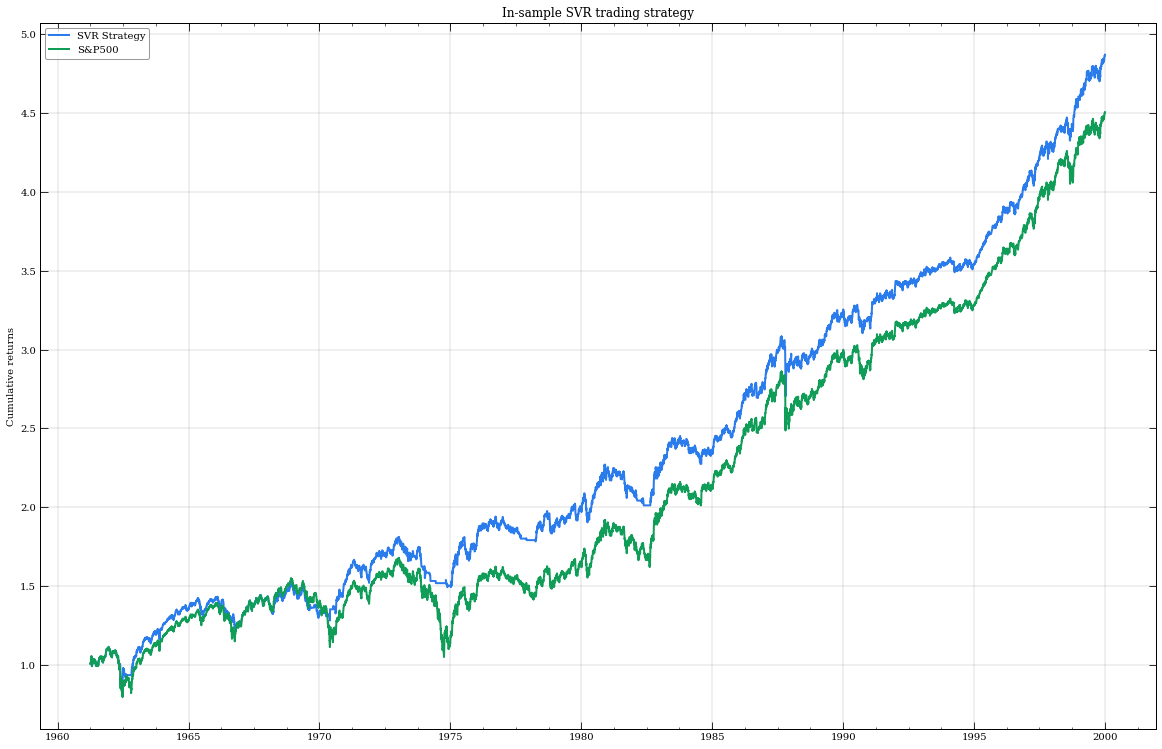

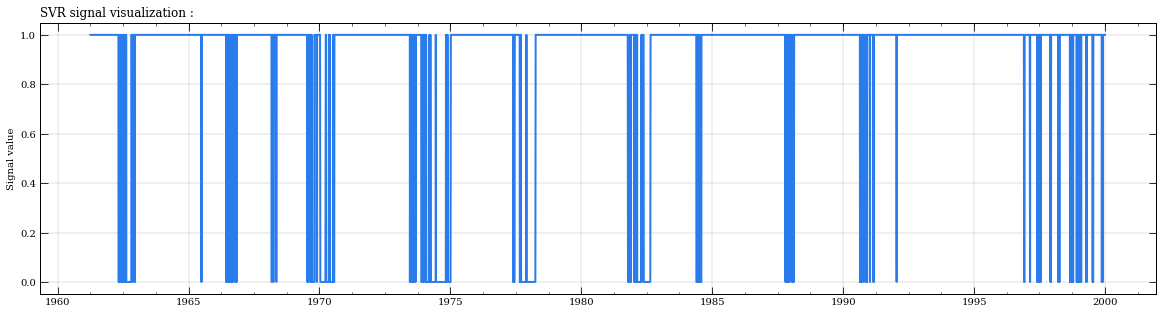

Indicator:  SVR 0 	 | 	 Sharpe ratio:  0.7861 	 t_stat:  6.1753 	 p-value:  0.0 


In [ ]:
# In-sample visualization:
plt.figure(figsize=(20,13))
plt.plot(1 + svr_strategy_in['Strategy'].cumsum())
plt.plot(1 + svm_dataset['Change'].iloc[:split].cumsum())
plt.title('In-sample SVR trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['SVR Strategy','S&P500'])
plt.show()

# ANN indicator visualization
plt.figure(figsize = (20,5))
plt.title('SVR signal visualization :', loc = 'left')
plt.ylabel('Signal value')
plt.plot(svr_strategy_in['Signal'])
plt.show()

# Statistical significance
T_test(df['Change'],svr_strategy_in['Strategy'],'SVR',(0),1)

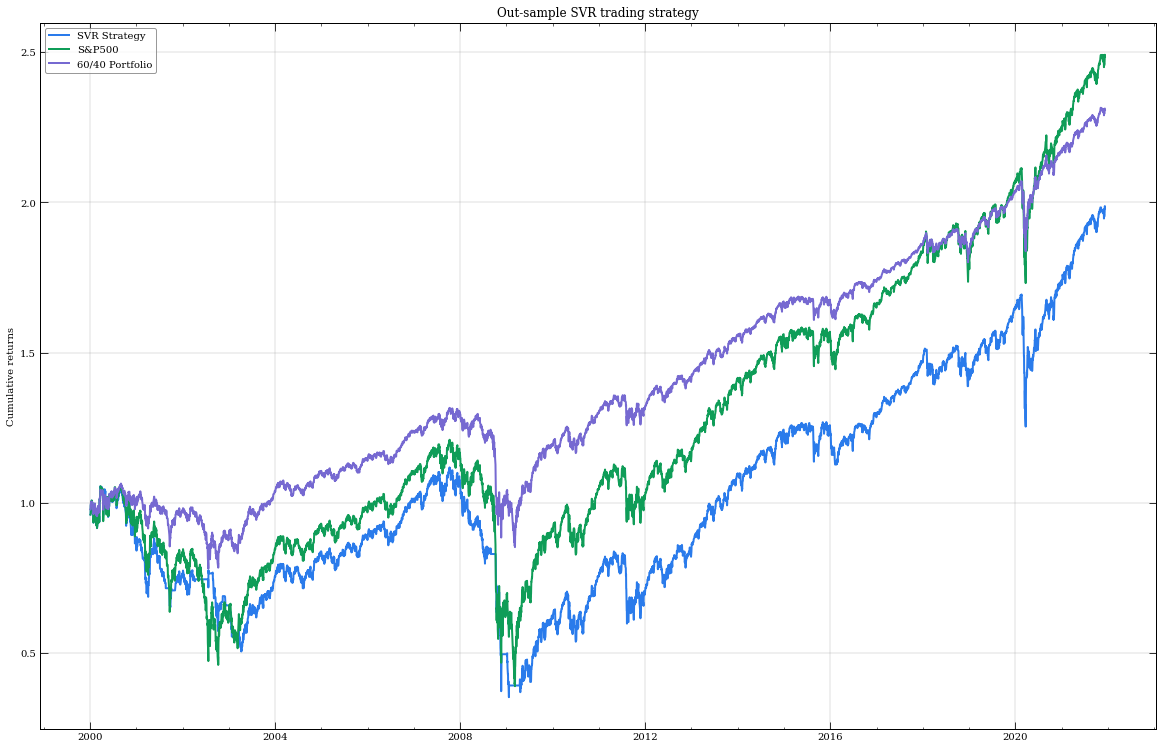

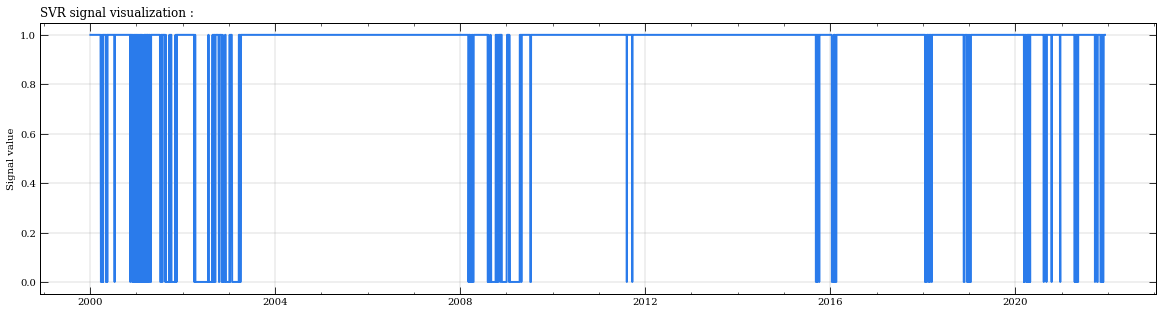

Indicator:  SVR 0 	 | 	 Sharpe ratio:  0.2702 	 t_stat:  2.1229 	 p-value:  0.0338 


In [ ]:
# Out-sample SVR visualization:
plt.figure(figsize=(20,13))
plt.plot(1 + svr_strategy_out['Strategy'].cumsum())
plt.plot(1 + svm_dataset['Change'].iloc[split:].cumsum())
plt.plot(1 + df_out['60/40'].cumsum())
plt.title('Out-sample SVR trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['SVR Strategy','S&P500','60/40 Portfolio'])
plt.show()

# ANN Signal visualization
plt.figure(figsize = (20,5))
plt.title('SVR signal visualization :', loc = 'left')
plt.ylabel('Signal value')
plt.plot(svr_strategy_out['Signal'])
plt.show()

# Statistical significance
T_test(df['Change'],svr_strategy_out['Strategy'],'SVR',(0),1)

## ANN : sharpe optimized

In [ ]:
#Libraries
import optuna
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler

In [ ]:
# Dataframe preparation
df = Dataset

# indicator preparation
macd = MACD(df,56,74,True)
rsi = RSI(df,67,True).dropna()
evm = EVM(df,31,True).dropna()

indicator = pd.concat([macd['Trend'],rsi['RSI'],evm['EVM']],axis =1).dropna()
ann_dataset = pd.concat([indicator,Dataset['Change']], axis = 1).dropna()

# Add of noise on indicators (Data Augmentation)
for i in range(5):

  # MACD 
  noise = np.random.normal(0, np.mean(np.sqrt(ann_dataset["Trend"])/10), len(ann_dataset))
  ann_dataset["Trend(noise_"+str(i)+")"] = ann_dataset["Trend"] + noise

  # RSI
  noise = np.random.normal(0, np.mean(np.sqrt(ann_dataset["RSI"])/10), len(ann_dataset))
  ann_dataset["RSI(noise_"+str(i)+")"] = ann_dataset["RSI"] + noise

  # EMV
  noise = np.random.normal(0, np.mean(np.sqrt(ann_dataset["EVM"])/10), len(ann_dataset))
  ann_dataset["EVM(noise_"+str(i)+")"] = ann_dataset["EVM"] + noise

In [ ]:
# Data cleaning
split = len(ann_dataset.loc[(ann_dataset.index <'2000-01-01')])

model_train = ["Trend","Trend(noise_0)","Trend(noise_1)","Trend(noise_2)","Trend(noise_3)","Trend(noise_4)",
        "RSI","RSI(noise_0)","RSI(noise_1)","RSI(noise_2)","RSI(noise_3)","RSI(noise_4)",
        "EVM","EVM(noise_0)","EVM(noise_1)","EVM(noise_2)","EVM(noise_3)","EVM(noise_4)"
        ]

model_test = ["Trend","Trend","Trend","Trend","Trend","Trend",
        "RSI","RSI","RSI","RSI","RSI","RSI",
        "EVM","EVM","EVM","EVM","EVM","EVM"]

# Raw dataset
X_train = ann_dataset[model_train].iloc[:split]
X_test = ann_dataset[model_test].iloc[split:]
y_train = np.round(ann_dataset[["Change"]].iloc[:split]+0.5)
y_test = np.round(ann_dataset[["Change"]].iloc[split:]+0.5)


# Data Standardization
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X = rc.transform(ann_dataset[model_test])
X_test = rc.transform(X_test)

In [ ]:
#Function

# Non numerical params to optimize 
learning_rate = 0
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}


# Objective Function 
def ann_cl_bo(trial):

  # Optimization Bounds 
  neurons = trial.suggest_int('neurons', 10, 100)
  batch_size = trial.suggest_int('batch_size', 200, 1000)
  epochs = trial.suggest_int('epochs', 20, 100)
  learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
  optimizer = trial.suggest_int('optimizer', 0,7)

  # Optimizer 
  optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
  optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}

  opt = optimizerD[optimizerL[optimizer]]
  
  # Neural Network
  nn = Sequential()
  nn.add(Dense(neurons, input_shape=(np.size(model_train),), activation = 'relu'))
  nn.add(Dense(neurons, input_shape=(np.size(model_train),), activation = 'relu'))
  nn.add(Dense(1, activation='linear'))
  nn.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

  # Sharpe ratio scoring
  nn.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, verbose = 0)


  # Signal and cost list
  signal = np.where(nn.predict(X_train).flatten()<0.5,0,1)
  cost = []

  # Cost inclusion
  for i in range(1,len(signal)):
    if (signal[i] == 0) and (signal[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  
  
  returns = signal * ann_dataset['Change'].iloc[:split] + np.array(cost)
  if np.sum(returns) == 0 or np.mean(returns) < 0 or np.sum(cost) == 0:
    sharpe = 0
  else:
    sharpe = (np.mean(returns) / np.std(returns[returns<0]))*np.sqrt(252)

  return sharpe

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(ann_cl_bo, n_trials=200)

[I 2022-06-16 12:47:41,640] A new study created in memory with name: no-name-31df1815-6b02-4107-9746-919f639afd7c
[I 2022-06-16 12:47:45,593] Trial 0 finished with value: 0.582270155996208 and parameters: {'neurons': 63, 'batch_size': 700, 'epochs': 92, 'learning_rate': 0.8023214891829781, 'optimizer': 4}. Best is trial 0 with value: 0.582270155996208.
[I 2022-06-16 12:47:49,140] Trial 1 finished with value: 0.0 and parameters: {'neurons': 19, 'batch_size': 517, 'epochs': 58, 'learning_rate': 0.699335053443109, 'optimizer': 2}. Best is trial 0 with value: 0.582270155996208.
[I 2022-06-16 12:47:52,038] Trial 2 finished with value: 0.45609287467508336 and parameters: {'neurons': 13, 'batch_size': 773, 'epochs': 77, 'learning_rate': 0.9008575978179553, 'optimizer': 6}. Best is trial 0 with value: 0.582270155996208.
[I 2022-06-16 12:47:54,428] Trial 3 finished with value: 0.0 and parameters: {'neurons': 20, 'batch_size': 764, 'epochs': 76, 'learning_rate': 0.7310885402521375, 'optimizer': 

In [ ]:
# Extract values from the optimization

a = []
b = []
for i in range(200):
  a = []
  # Score 
  a.append(study.get_trials()[i].value)

  # Params 
  a.append(study.get_trials()[i].params.get('batch_size'))
  a.append(study.get_trials()[i].params.get('epochs'))
  a.append(study.get_trials()[i].params.get('learning_rate'))
  a.append(study.get_trials()[i].params.get('neurons'))
  a.append(study.get_trials()[i].params.get('optimizer'))
  b.append(a)

data = pd.DataFrame(np.array(b), columns =['Sharpe Ratio', 'Batch Size', 'Epochs','Learning Rate','Neurons','Optimizer'])
data.to_excel('study_ann.xlsx')
print(study.best_params)

{'neurons': 33, 'batch_size': 853, 'epochs': 61, 'learning_rate': 0.7099442602890207, 'optimizer': 4}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Fit the model with in-sample performance selction 

# Non-numerical hyperparameter values setup
learning_rate = study.best_params['learning_rate']
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}

opt = optimizerD[optimizerL[study.best_params['optimizer']]]

ann_list = []
for i in tqdm(range(50)):

  ann_name = 'ANN_' + str(i)
  ann_list.append(ann_name)

  # Activate the classifier
  classifier = Sequential()
  # First (hidden) layer
  classifier.add(Dense(int(study.best_params['neurons']), 
                      input_shape = (np.size(model_train),), 
                      activation = 'relu'))
  # Second(hidden) layer
  classifier.add(Dense(int(study.best_params['neurons']), 
                      input_shape = (np.size(model_train),), 
                      activation = 'relu'))

  # Output layer 
  classifier.add(Dense(1, activation="linear"))

  # Compile model 
  classifier.compile(loss="mse", optimizer = opt)


  # Train the model 
  classifier.fit(X_train, y_train, epochs=int(study.best_params['epochs']),
                batch_size = int(study.best_params['batch_size']), verbose = 0)

  # Prediction
  ann_dataset["prediction"+ann_name] = classifier.predict(X)

  # Signal and cost list
  signal = np.where(classifier.predict(X).flatten()<0.5,0,1)
  cost = []

  # Cost inclusion
  for i in range(1,len(signal)):
    if (signal[i] == 0) and (signal[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)

  # Create the signal 
  ann_dataset['Signal'+ann_name] = np.nan
  ann_dataset['Signal'+ann_name].loc[ann_dataset['prediction'+ann_name] < 0.5] = 0
  ann_dataset['Signal'+ann_name].loc[ann_dataset['prediction'+ann_name] > 0.5] = 1

  # Strategy returns 
  ann_dataset[ann_name] = ann_dataset["Signal"+ann_name] * ann_dataset["Change"] + np.array(cost)

# More effecient network selection 
perf_ann = (ann_dataset[ann_list].iloc[:split].mean()/ann_dataset[ann_list].iloc[:split].std())*np.sqrt(252)
max_ann = max(perf_ann)
position = np.where(perf_ann == max_ann)[0].tolist()[0]

100%|██████████| 50/50 [02:58<00:00,  3.56s/it]


In [ ]:
# Data Frame of the Artificial Neural Network results 

# In-sample
ann_strategy_in = pd.DataFrame(ann_dataset['ANN_'+str(position)].iloc[:split])
ann_strategy_in.columns = ['Strategy']
ann_strategy_in['Signal'] = ann_dataset['Signal'+'ANN_'+str(position)].iloc[:split]

# Out-Sample
ann_strategy_out = pd.DataFrame(ann_dataset['ANN_'+str(position)].iloc[split:])
ann_strategy_out.columns = ['Strategy']
ann_strategy_out['Signal'] = ann_dataset['Signal'+'ANN_'+str(position)].iloc[split:]

ann_strategy_out.to_excel("ann_strategy.xlsx")

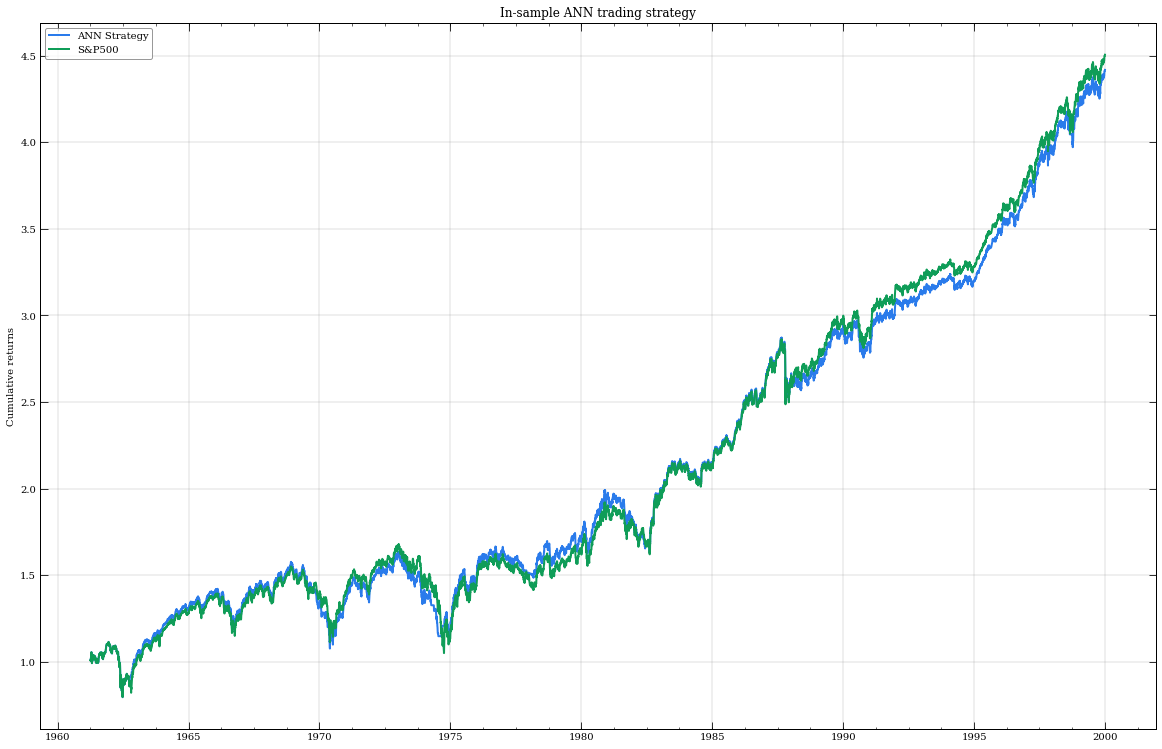

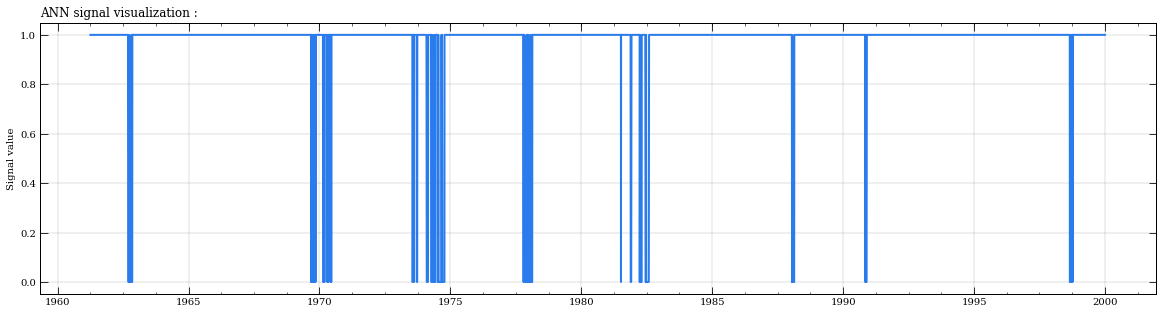

Indicator:  ANN {'neurons': 33, 'batch_size': 853, 'epochs': 61, 'learning_rate': 0.7099442602890207, 'optimizer': 4} 	 | 	 Sharpe ratio:  0.6493 	 t_stat:  5.1002 	 p-value:  0.0 


In [ ]:
# In-sample ANN visualization:
plt.figure(figsize=(20,13))
plt.plot(1 + ann_strategy_in['Strategy'].cumsum())
plt.plot(1 + ann_dataset['Change'].iloc[:split].cumsum())
plt.title('In-sample ANN trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['ANN Strategy','S&P500'])
plt.show()

# ANN Signal visualization
plt.figure(figsize = (20,5))
plt.title('ANN signal visualization :', loc = 'left')
plt.ylabel('Signal value')
plt.plot(ann_strategy_in['Signal'])
plt.show()

# Statistical significance
T_test(df['Change'],ann_strategy_in['Strategy'],'ANN',(study.best_params),1)

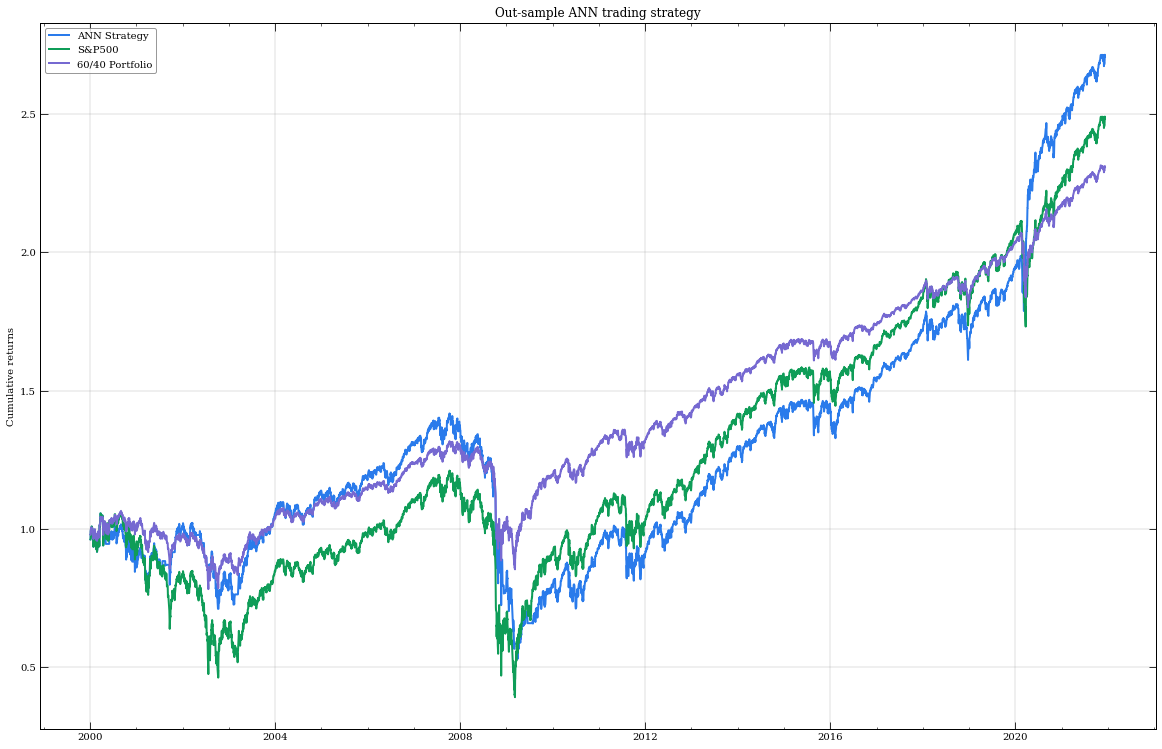

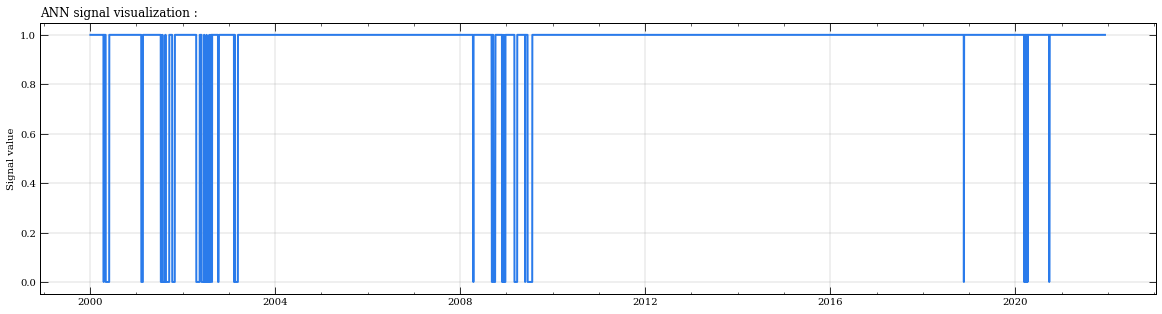

Indicator:  ANN {'neurons': 33, 'batch_size': 853, 'epochs': 61, 'learning_rate': 0.7099442602890207, 'optimizer': 4} 	 | 	 Sharpe ratio:  0.4398 	 t_stat:  3.4546 	 p-value:  0.0006 


In [ ]:
# Out-sample ANN visualization:
plt.figure(figsize=(20,13))
plt.plot(1 + ann_strategy_out['Strategy'].cumsum())
plt.plot(1 + ann_dataset['Change'].iloc[split:].cumsum())
plt.plot(1 + df_out['60/40'].cumsum())
plt.title('Out-sample ANN trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['ANN Strategy','S&P500','60/40 Portfolio'])
plt.show()

# ANN Signal visualization
plt.figure(figsize = (20,5))
plt.title('ANN signal visualization :', loc = 'left')
plt.ylabel('Signal value')
plt.plot(ann_strategy_out['Signal'])
plt.show()

# Statistical significance
T_test(df['Change'],ann_strategy_out['Strategy'],'ANN',(study.best_params),1)

In [ ]:
# Scientific visualization of the Network
#tensorflow.keras.utils.plot_model(classifier, to_file='model.png', show_shapes=True, show_layer_names=True)

## RNN: sharpe optimized

In [ ]:
#Libraries
import optuna
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler

import optuna
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataframe preparation
df = Dataset

# indicator preparation
macd = MACD(df,56,74,True)
rsi = RSI(df,67,True).dropna()
evm = EVM(df,31,True).dropna()

indicator = pd.concat([macd['Trend'],rsi['RSI'],evm['EVM']],axis =1).dropna()
rnn_dataset = pd.concat([indicator,Dataset['Change']], axis = 1).dropna()

# Add of noise on indicators (Data Augmentation)
for i in range(5):

  # MACD 
  noise = np.random.normal(0, np.mean(np.sqrt(rnn_dataset["Trend"])/10), len(rnn_dataset))
  rnn_dataset["Trend(noise_"+str(i)+")"] = rnn_dataset["Trend"] + noise

  # RSI
  noise = np.random.normal(0, np.mean(np.sqrt(rnn_dataset["RSI"])/10), len(rnn_dataset))
  rnn_dataset["RSI(noise_"+str(i)+")"] = rnn_dataset["RSI"] + noise

  # EMV
  noise = np.random.normal(0, np.mean(np.sqrt(rnn_dataset["EVM"])/10), len(rnn_dataset))
  rnn_dataset["EVM(noise_"+str(i)+")"] = rnn_dataset["EVM"] + noise

# Data cleaning
split = len(rnn_dataset.loc[(rnn_dataset.index <'2000-01-01')])

model_train = ["Trend","Trend(noise_0)","Trend(noise_1)","Trend(noise_2)","Trend(noise_3)","Trend(noise_4)",
        "RSI","RSI(noise_0)","RSI(noise_1)","RSI(noise_2)","RSI(noise_3)","RSI(noise_4)",
        "EVM","EVM(noise_0)","EVM(noise_1)","EVM(noise_2)","EVM(noise_3)","EVM(noise_4)"
        ]

model_test = ["Trend","Trend","Trend","Trend","Trend","Trend",
        "RSI","RSI","RSI","RSI","RSI","RSI",
        "EVM","EVM","EVM","EVM","EVM","EVM"
        ]

# Raw dataset
X_train = rnn_dataset[model_train].iloc[:split]
X_test = rnn_dataset[model_test].iloc[split:]
y_train = np.round(rnn_dataset[["Change"]].iloc[:split]+0.5)
y_test = np.round(rnn_dataset[["Change"]].iloc[split:]+0.5)


# Data Standardization
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X = rc.transform(rnn_dataset[model_test])
X_test = rc.transform(X_test)

In [ ]:
def X_3d_RNN(X_s, y_s, lag):

    # Simple verification
    if len(X_s) != len(y_s):
        print("Warnings")

    # Create the X_train
    X_train = []
    for variable in range(0, X_s.shape[1]):
        X = []
        for i in range(lag, X_s.shape[0]):
            X.append(X_s[i-lag:i, variable])
        X_train.append(X)
    X_train, np.array(X_train)
    X_train = np.swapaxes(np.swapaxes(X_train, 0, 1), 1, 2)

    # Create the y_train
    y_train = []
    for i in range(lag, y_s.shape[0]):
        y_train.append(y_s[i, :].reshape(-1,1).transpose())
    y_train = np.concatenate(y_train, axis=0)
    return X_train, y_train

lag = 15
X_train_3d, y_train_3d = X_3d_RNN(X_train, y_train.values, lag)
X_test_3d, y_test_3d = X_3d_RNN(X_test, y_test.values, lag)

In [ ]:
# Non numerical params to optimize 
learning_rate = 0
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}



# Objective Function 
def rnn_cl_bo(trial):

  # Optimization Bounds 
  neurons = trial.suggest_int('neurons', 10, 100)
  batch_size = trial.suggest_int('batch_size', 500, 1000)
  epochs = trial.suggest_int('epochs', 1, 10)
  learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
  optimizer = trial.suggest_int('optimizer', 0,7)

  # Optimizer 
  optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
  optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}

  opt = optimizerD[optimizerL[optimizer]]

  # Neural Network
  nn = Sequential()
  nn.add(LSTM(units = neurons,return_sequences = True,input_shape = (X_train_3d.shape[1],X_train_3d.shape[2],)))
  nn.add(LSTM(units = neurons, return_sequences = True))
  nn.add(LSTM(units = neurons, return_sequences = False))
  nn.add(Dense(1, activation="sigmoid"))
  nn.compile(loss="binary_crossentropy", optimizer=opt)

  # Sharpe ratio scoring
  nn.fit(X_train_3d, y_train_3d, validation_data=(X_test_3d, y_test_3d), epochs=epochs,batch_size = batch_size, verbose = 0)
  y_pred_train = np.concatenate((np.zeros([lag,1]),nn.predict(X_train_3d)),axis=0)
  #returns = np.where(y_pred_train.flatten()<0.5,0,1) * SP_1['Adj Close'].iloc[:split]

  # Signal and cost list
  signal = np.where(y_pred_train.flatten()<0.5,0,1)
  cost = []

  # Cost inclusion
  for i in range(1,len(signal)):
    if (signal[i] == 0) and (signal[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  
  
  returns = signal * rnn_dataset['Change'].iloc[:split] + np.array(cost)
  if np.sum(returns) == 0 or np.mean(returns) < 0 or np.sum(cost) == 0:
    sharpe = 0
  else:
    sharpe = (np.mean(returns) / np.std(returns[returns<0]))*np.sqrt(252)

  return sharpe

In [ ]:
# 32min of running time
study = optuna.create_study(direction='maximize')
study.optimize(rnn_cl_bo, n_trials=50)

[I 2022-06-16 13:08:15,596] A new study created in memory with name: no-name-080b170e-a968-4738-8a82-6d57e78ac0d6
[I 2022-06-16 13:08:36,674] Trial 0 finished with value: 0.0 and parameters: {'neurons': 98, 'batch_size': 664, 'epochs': 1, 'learning_rate': 0.963208007573052, 'optimizer': 5}. Best is trial 0 with value: 0.0.
[I 2022-06-16 13:09:08,710] Trial 1 finished with value: 0.0 and parameters: {'neurons': 70, 'batch_size': 921, 'epochs': 4, 'learning_rate': 0.9107265217271309, 'optimizer': 6}. Best is trial 0 with value: 0.0.
[I 2022-06-16 13:09:32,497] Trial 2 finished with value: 0.8788266029721189 and parameters: {'neurons': 27, 'batch_size': 976, 'epochs': 9, 'learning_rate': 0.5590345342813756, 'optimizer': 4}. Best is trial 2 with value: 0.8788266029721189.
[I 2022-06-16 13:10:03,178] Trial 3 finished with value: 0.0 and parameters: {'neurons': 46, 'batch_size': 781, 'epochs': 6, 'learning_rate': 0.45202220984796626, 'optimizer': 5}. Best is trial 2 with value: 0.87882660297

In [ ]:
# Extract values from the optimization

a = []
b = []
for i in range(50):
  a = []
  # Score 
  a.append(study.get_trials()[i].value)

  # Params 
  a.append(study.get_trials()[i].params.get('batch_size'))
  a.append(study.get_trials()[i].params.get('epochs'))
  a.append(study.get_trials()[i].params.get('learning_rate'))
  a.append(study.get_trials()[i].params.get('neurons'))
  a.append(study.get_trials()[i].params.get('optimizer'))
  b.append(a)

data = pd.DataFrame(np.array(b), columns =['Sharpe Ratio', 'Batch Size', 'Epochs','Learning Rate','Neurons','Optimizer'])
data.to_excel('study_rnn.xlsx')
print(study.best_params)

{'neurons': 27, 'batch_size': 976, 'epochs': 9, 'learning_rate': 0.5590345342813756, 'optimizer': 4}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
learning_rate = study.best_params['learning_rate']
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}

opt = optimizerD[optimizerL[study.best_params['optimizer']]]

In [ ]:
rnn_list = []
for i in tqdm(range(50)):

  rnn_name = 'RNN_' + str(i)
  rnn_list.append(rnn_name)

  # LSTM RNN model 
  nn = Sequential()
  nn.add(LSTM(units = int(study.best_params['neurons']),return_sequences = True,input_shape = (X_train_3d.shape[1],X_train_3d.shape[2],)))
  nn.add(LSTM(units = int(study.best_params['neurons']), return_sequences = True))
  nn.add(LSTM(units = int(study.best_params['neurons']), return_sequences = False))
  nn.add(Dense(1, activation="sigmoid"))
  nn.compile(loss="binary_crossentropy", optimizer=opt)

  # Fit the model 
  nn.fit(X_train_3d, y_train_3d, validation_data=(X_test_3d, y_test_3d), 
        epochs=int(study.best_params['epochs']),
        batch_size = int(study.best_params['batch_size']), 
        verbose = 0)

  # Create predictions for the whole dataset
  y_pred_train = np.concatenate((np.zeros([lag,1]),nn.predict(X_train_3d)),axis=0)
  y_pred_test = np.concatenate((np.zeros([lag,1]),nn.predict(X_test_3d)),axis=0)
  rnn_dataset["Prediction"+rnn_name] = np.concatenate((y_pred_train,y_pred_test),axis=0)
  rnn_dataset["Signal"+rnn_name] = np.where(rnn_dataset["Prediction"+rnn_name] < 0.5, 0,1)

  # Signal and cost list
  signal = np.array(rnn_dataset["Signal"+rnn_name]).tolist()
  cost = []

  # Cost inclusion
  for i in range(1,len(signal)):
    if (signal[i] == 0) and (signal[i-1] == 1):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)

  # Compute the strategy 
  rnn_dataset[rnn_name] = rnn_dataset["Signal"+rnn_name] * rnn_dataset["Change"] + np.array(cost)

#Plot the results
perf_rnn = (rnn_dataset[rnn_list].iloc[:split].mean()/rnn_dataset[rnn_list].iloc[:split].std())*np.sqrt(252)
max_rnn = max(perf_rnn)
position = np.where(perf_rnn == max_rnn)[0].tolist()[0]

100%|██████████| 50/50 [22:58<00:00, 27.57s/it]


In [ ]:
# Data Frame of the Recurrent Neural Network results 
rnn_strategy_in = pd.DataFrame(rnn_dataset['RNN_'+str(position)].iloc[:split])
rnn_strategy_in.columns = ['Strategy']
rnn_strategy_in['Signal'] = rnn_dataset['Signal'+'RNN_'+str(position)].iloc[:split]

rnn_strategy_out = pd.DataFrame(rnn_dataset['RNN_'+str(position)].iloc[split:])
rnn_strategy_out.columns = ['Strategy']
rnn_strategy_out['Signal'] = rnn_dataset['Signal'+'RNN_'+str(position)].iloc[split:]

rnn_strategy_out.to_excel("rnn_strategy.xlsx")

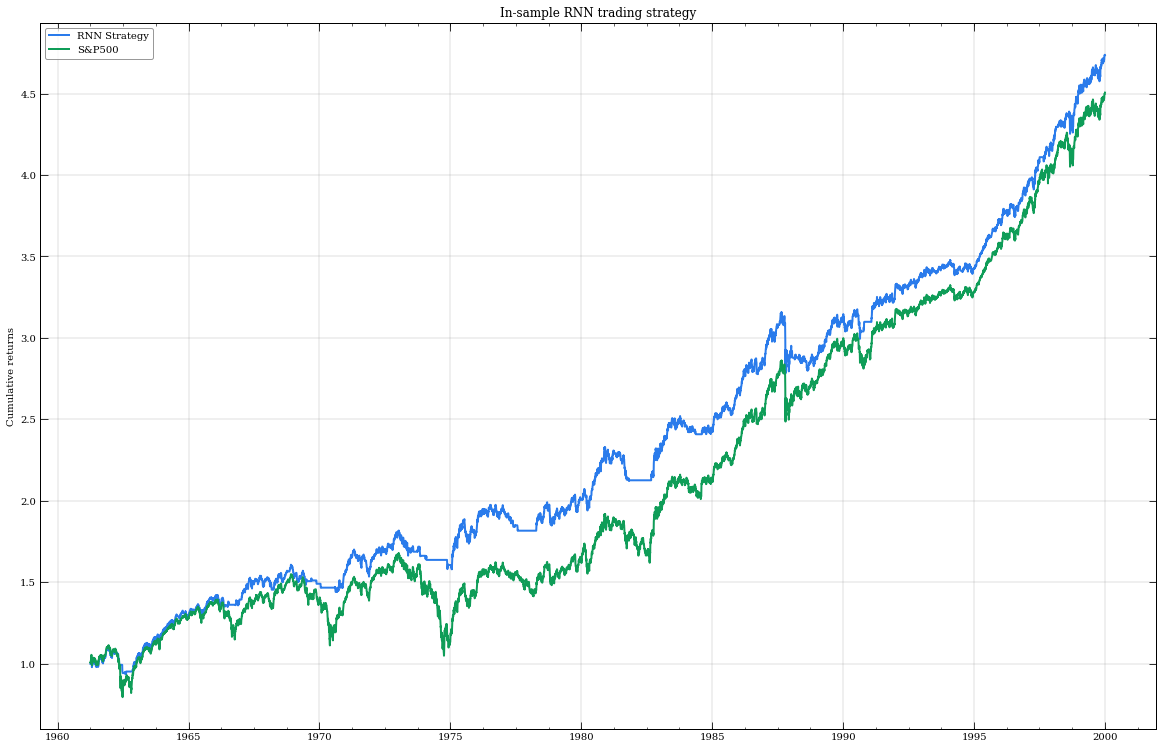

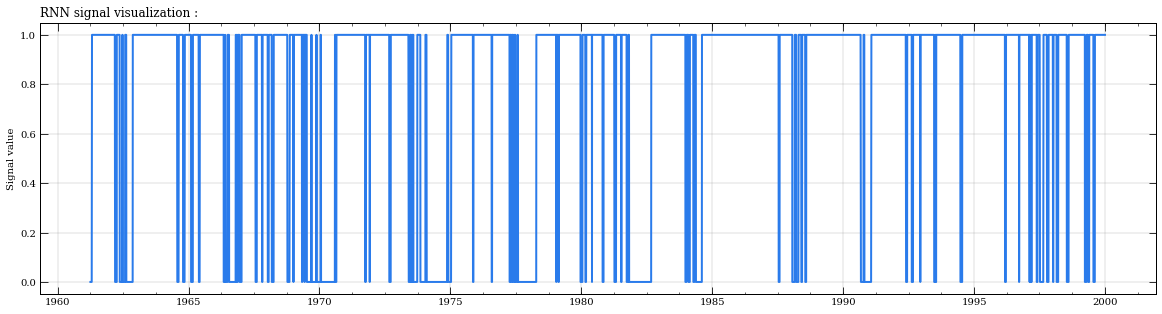

Indicator:  RNN {'neurons': 27, 'batch_size': 976, 'epochs': 9, 'learning_rate': 0.5590345342813756, 'optimizer': 4} 	 | 	 Sharpe ratio:  0.8072 	 t_stat:  6.3412 	 p-value:  0.0 


In [ ]:
# In-sample RNN visualization:
plt.figure(figsize=(20,13))
plt.plot(1 + rnn_strategy_in['Strategy'].cumsum())
plt.plot(1 + rnn_dataset['Change'].iloc[:split].cumsum())
plt.title('In-sample RNN trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['RNN Strategy','S&P500'])
plt.show()

# RNN Signal visualization
plt.figure(figsize = (20,5))
plt.title('RNN signal visualization :', loc = 'left')
plt.ylabel('Signal value')
plt.plot(rnn_strategy_in['Signal'])
plt.show()

# Statistical significance
T_test(df['Change'],rnn_strategy_in['Strategy'],'RNN',(study.best_params),1)

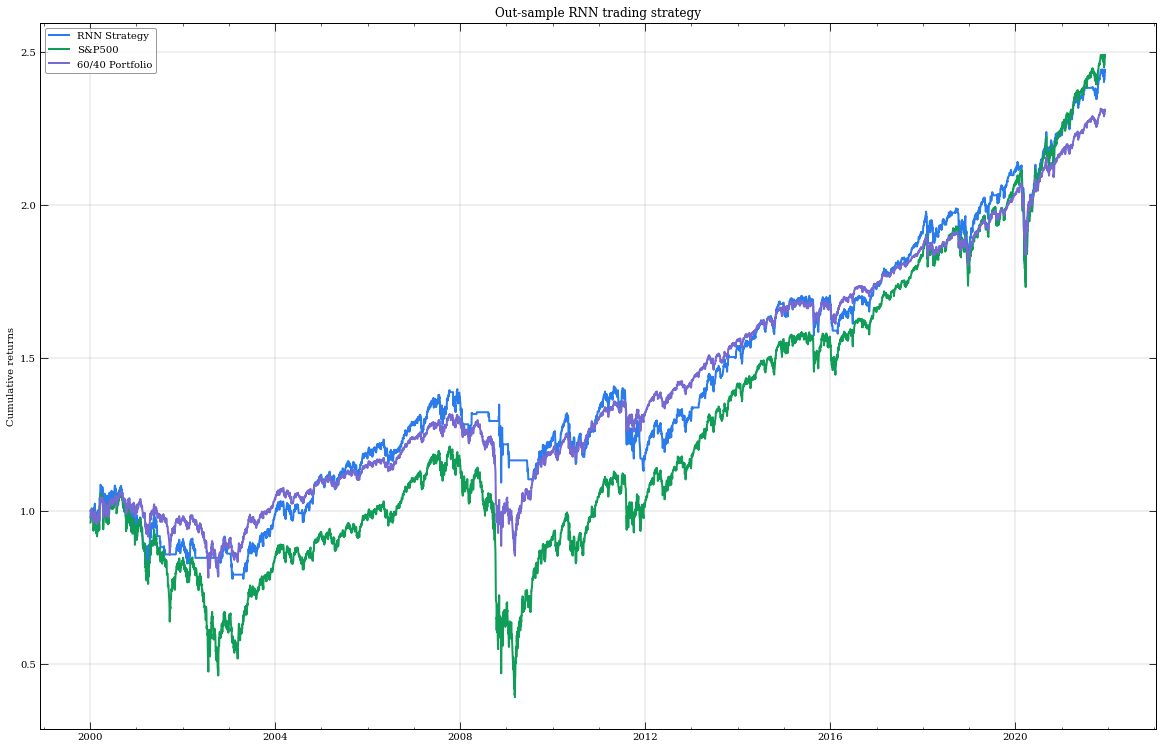

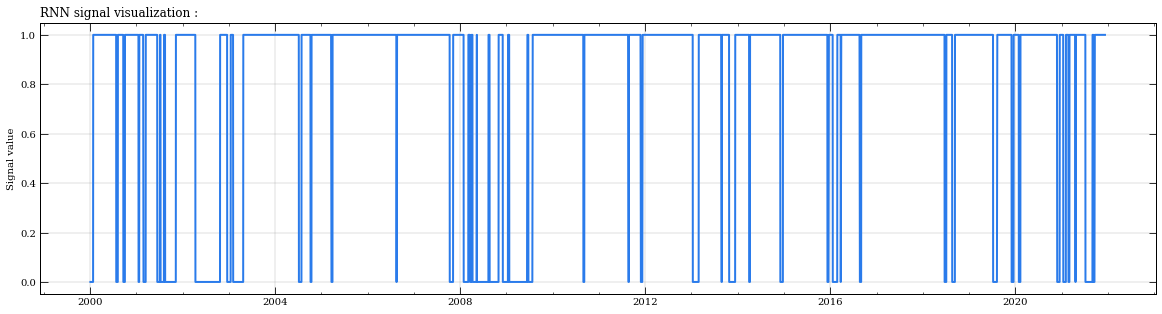

Indicator:  RNN {'neurons': 27, 'batch_size': 976, 'epochs': 9, 'learning_rate': 0.5590345342813756, 'optimizer': 4} 	 | 	 Sharpe ratio:  0.4139 	 t_stat:  3.2512 	 p-value:  0.0012 


In [ ]:
# Out-sample RNN visualization:
plt.figure(figsize=(20,13))
plt.plot(1 + rnn_strategy_out['Strategy'].cumsum())
plt.plot(1 + rnn_dataset['Change'].iloc[split:].cumsum())
plt.plot(1 + df_out['60/40'].cumsum())
plt.title('Out-sample RNN trading strategy')
plt.ylabel('Cumulative returns')
plt.legend(['RNN Strategy','S&P500','60/40 Portfolio'])
plt.show()

# RNN Signal visualization
plt.figure(figsize = (20,5))
plt.title('RNN signal visualization :', loc = 'left')
plt.ylabel('Signal value')
plt.plot(rnn_strategy_out['Signal'])
plt.show()

# Statistical significance
T_test(df['Change'],rnn_strategy_out['Strategy'],'RNN',(study.best_params),1)

# Part 1: Results 

### Metrics functions

In [ ]:
def metrics(dataframe): 

  """
  The dataframe must contains only one column corresponding to the strategy
  to be studied.
  """

  # Annualized returns:
  ann_ret = dataframe.mean()*252

  # Annualized standard deviation:
  ann_std = dataframe.std()*np.sqrt(252)

  # Sharpe ratio
  sharpe = ann_ret / ann_std 

  # Sortino ratio
  sortino = (dataframe.mean() / dataframe[dataframe<0].std()) * np.sqrt(252)

  # VaR at 95% 
  var = np.array(dataframe.sort_values(ascending = True))[int(len(dataframe)*0.05)]

  # CVaR at 95%
  cvar = np.array(dataframe.sort_values(ascending = True))[:int(len(dataframe)*0.05)].mean()

  # Maximum drawdown 
  cumul = dataframe.dropna().cumsum()+1
  rolling_max = np.maximum.accumulate(cumul)
  max_drawdown  = np.min(cumul/rolling_max - 1)

  # Format:
  metlist = ['Ann. Returns', 'Ann. Std. Dev.', 'Sharpe', 'Sortino', 'VaR', 'CVaR', 'MDD']
  met = np.array([round(ann_ret,3),
                  round(ann_std,3),
                  round(sharpe,3),
                  round(sortino,3),
                  round(var,3),
                  round(cvar,3),
                  round(max_drawdown,3)])
  metrics = pd.DataFrame(met, index = metlist).transpose()

  return metrics

### Results

Technical indicator trading

In [ ]:
# In-sample performance technical indicator trading: 

in_sample = (Dataset.index > '1960-01-01') & (Dataset.index <= '2000-01-01')

df = Dataset.loc[in_sample]
macd = MACD(df,best_small,best_large,True)
macd = macd.dropna()

df = Dataset.loc[in_sample]
rsi = RSI(df,best_param_rsi,True)
rsi = rsi.dropna()

df = Dataset.loc[in_sample]
emv = EVM(df,best_param_emv,True)
emv = emv.dropna()

bench = metrics(Dataset['Change'].iloc[:split])
macd = metrics(macd['Strategy'])
rsi = metrics(rsi['Strategy'])
emv = metrics(emv['Strategy'])

table_in = pd.concat([bench, macd, rsi, emv], axis = 0).dropna()
table_in.index = ['S&P500', 'MACD', 'RSI', 'EMV']
table_in.to_excel('table_in_ta.xlsx')
table_in

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
S&P500,0.082,0.138,0.596,0.775,-0.013,-0.019,-0.356
MACD,0.080,0.116,0.685,0.742,-0.011,-0.017,-0.135
RSI,0.083,0.104,0.800,0.933,-0.010,-0.016,-0.107
EMV,0.089,0.134,0.667,0.874,-0.013,-0.019,-0.332


In [ ]:
# Out-sample performance technical indicator trading:

out_sample = (Dataset.index > '1998-01-01') & (Dataset.index <= '2022-01-01')

df = Dataset.loc[out_sample]
macd = MACD(df,best_small,best_large,True)
macd = macd.dropna()

df = Dataset.loc[out_sample].dropna()
rsi = RSI(df,best_param_rsi,True).dropna()
rsi = rsi.dropna()

df = Dataset.loc[out_sample]
emv = EVM(df,best_param_emv,True).dropna()
emv = emv.dropna()

bench = metrics(df['60/40'])
macd = metrics(macd['Strategy'])
rsi = metrics(rsi['Strategy'])
emv = metrics(emv['Strategy'])

table_out = pd.concat([bench, macd, rsi, emv], axis = 0).dropna()
table_out.index = ['60/40 Portfolio', 'MACD', 'RSI', 'EMV']
table_out.to_excel('table_out_ta.xlsx')
table_out

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060,0.114,0.527,0.656,-0.010,-0.017,-0.352
MACD,0.069,0.136,0.506,0.538,-0.013,-0.021,-0.158
RSI,0.009,0.112,0.085,0.085,-0.012,-0.019,-0.664
EMV,0.063,0.173,0.364,0.448,-0.018,-0.027,-0.587


Machine Learning and Deep Learning Trading 

In [ ]:
# Data Frame of ML and DL in-sample results 
split = len(ann_dataset.loc[(ann_dataset.index <'2000-01-01')])

bench = metrics(Dataset['Change'].iloc[:split])
svr = metrics(svr_strategy_in['Strategy'])
ann = metrics(ann_strategy_in['Strategy'])
rnn = metrics(rnn_strategy_in['Strategy'])

table__mldl_in = pd.concat([bench, svr, ann,rnn], axis = 0).dropna()
table__mldl_in.index = ['S&P500', 'SVR', 'ANN', 'RNN']
table__mldl_in.to_excel('table_in_mldl.xlsx')
table__mldl_in

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
S&P500,0.082,0.138,0.596,0.775,-0.013,-0.019,-0.356
SVR,0.100,0.127,0.786,0.955,-0.012,-0.018,-0.194
ANN,0.088,0.136,0.649,0.828,-0.013,-0.019,-0.318
RNN,0.097,0.120,0.807,0.908,-0.011,-0.017,-0.152


In [ ]:
# Data Frame of ML and DL out-sample results 
split = len(ann_dataset.loc[(ann_dataset.index <'2000-01-01')])

bench = metrics(Dataset['60/40'].iloc[split:])
svr = metrics(svr_strategy_out['Strategy'])
ann = metrics(ann_strategy_out['Strategy'])
rnn = metrics(rnn_strategy_out['Strategy'])

table__mldl_out = pd.concat([bench, svr, ann, rnn], axis = 0).dropna()
table__mldl_out.index = ['60/40 Portfolio', 'SVR', 'ANN', 'RNN']
table__mldl_out.to_excel('table_out_mldl.xlsx')
table__mldl_out

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060,0.114,0.527,0.656,-0.010,-0.017,-0.352
SVR,0.045,0.167,0.270,0.308,-0.016,-0.027,-0.684
ANN,0.079,0.179,0.440,0.541,-0.018,-0.028,-0.627
RNN,0.066,0.160,0.414,0.457,-0.015,-0.025,-0.284


# Part 2 — Portfolio Protection

## OBPI : Optimized OBPI with Risk Budgeting

In [ ]:
def OBPI(target,dataset):

  '''
  The portfolio is constructed in 3 steps:
  1) Classical trading portfolio
  2) Postion // Portfolio protection with protective put implementation
  3) Risk budgeting with the VIX level 
  '''

  # Individual variables 
  rf = 0.03
  T = 2
  vol_target = target
  risky_asset = [1]
  riskless_asset = [0]

  # Prepare the Dataset 

  # Option chain cleaning
  #Strike_str = ['-5%','-4%','-3%','-2%','-1%','0%','1%','2%','3%','4%','5%']
  #Option_Chain = pd.DataFrame(a, columns = Strike_str, index = sp500.index)

  # Final dataframe
  Data = pd.concat([Dataset['Adj Close'],Dataset['VIX'], Option_Chain], axis = 1).dropna()


  #Prepare the empty dataframe columns 
  Data['OBPI'] = np.nan
  Data['R_w'] = np.nan
  Data['RL_w'] = np.nan
  Strike = list(np.linspace(-0.05,0.05,11)+1)

  z = []
  # Running OBPI with a protective put implementation
  for i in tqdm(range(1,len(Data))):

    # Risk Budgeting on the overall portfolio
    risky_asset.append(min(vol_target / (Data['VIX'].iloc[i-1]/100), 1))
    riskless_asset.append(1 - risky_asset[i])

    # Find optimal strike given risk budgeting level
    position = int(min(riskless_asset[i]*10,10))
    z.append(position)

    # OBPI strategy: 
    X = (Data['Adj Close'].iloc[i-1]*Strike[position])
    ST = (Data['Adj Close'].iloc[i])
    maximum = np.max((ST,X))
    put = Data[Strike_str[position]].iloc[i-1] * np.exp(rf*T/252)
    Data['OBPI'].iloc[i] = ((maximum - Data['Adj Close'].iloc[i]) / Data['Adj Close'].iloc[i-1])  - (put / Data['Adj Close'].iloc[i]) 

  # Add Risk budgeting weights 
  Data['R_w'] = np.array(risky_asset)
  Data['RL_w'] = np.array(riskless_asset)

  # Return OBPI without trading strategy combination
  ret_OBPI = Data['Adj Close'].pct_change(1)*Data['R_w'] + Data['OBPI']*Data['RL_w']
  dataset['OBPI_base'] = ret_OBPI.dropna()


  # Signal and cost list
  signal_list = np.array(dataset['Signal']).tolist()
  cost = []

  # Cost inclusion
  for i in range(1,len(dataset)):
    if ((signal_list[i] == 0) and (signal_list[i-1] == 1)) or ((signal_list[i] == 1) and (signal_list[i-1] == 0)):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)

  dataset['Cost'] = pd.DataFrame(np.array(cost), index = dataset.index)

  # Return OBPI with trading strategy combination
  OBPI_strategy = dataset['Signal'] * dataset['OBPI_base'] + np.where(dataset['Signal'] == 0,1,0)*dataset['US Bond'] + dataset['Cost']
  dataset['OBPI'] = OBPI_strategy

  return dataset.dropna()

## CPPI - MT

In [ ]:
def CPPI(dataset,multiplier, rebalancing):

  # Strategy parameters
  n = 252
  protected = 1
  m = multiplier
  rate = 0.03
  k = 1

  # Dataframe treatment
  returns = np.array(dataset['Change']).tolist()
  bond = np.array(dataset['US Bond']).tolist()
  stock = k * ((1+np.array(returns)).cumprod()).tolist()

  # Shift of data 
  stock.insert(0,1)
  returns.insert(0,0)
  bond.insert(0,0)

  #–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––



  # Initial CPPI parameters
  cppi = k
  f = k*protected*np.exp(-rate*(len(returns)/n))
  c = cppi - f
  r = np.min([m*c,cppi])
  s = cppi - r

  # List
  portfolio = [k]
  floor = [f]
  cushion = [c]
  risky = [r]
  safe = [s]
  w_risk = [r/k]
  w_safe = [s/k]


  # Running the algorithm
  for i in range(1,len(returns)):
    
    # Portfolio value
    cppi = r * (1+returns[i]) + s * (1+bond[i]) 
    f = protected * np.exp(-rate*(len(returns)-i)/n)
    c = cppi - f
    r = max(min(m*c,cppi),0) 
    s = cppi - r

    # Update lists
    portfolio.append(cppi)
    floor.append(f)
    cushion.append(c)
    risky.append(r)
    safe.append(s)
    w_risk.append(r/cppi)
    w_safe.append(s/cppi)

  #–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
  # Create a dataframes of all strategy's components  
  total = [stock,np.round(portfolio,3),
            np.round(floor,3),np.round(cushion,3),
            np.round(risky,3),np.round(safe,3),
          np.round(w_risk,3),np.round(w_safe,3)]


  weights_cppi = pd.DataFrame(total, index= ['Stock Price', 'Portfolio','Floor', 
                              'Cushion', 'Risky Asset','Safe Asset','W_r','W_s']).transpose()
  weights_cppi = weights_cppi.iloc[:len(weights_cppi)-1,:]
  weights_cppi.index = dataset.index

  # Rebalancing Interval
  Test = weights_cppi[['W_r', 'W_s']]
  Test = Test.reset_index()
  Test.set_index('Date', inplace=True)
  Test = Test.resample(str(rebalancing)+'M').mean()

  # Add rebalnacing interval to the dataframe 
  dataset = pd.concat([dataset, Test], axis = 1)

  # Dataframe preparation on the trading portfolio
  dataset['W_r'].iloc[0:1] = weights_cppi['W_r'].iloc[0:1]
  dataset['W_s'].iloc[0:1] = weights_cppi['W_s'].iloc[0:1]
  dataset = dataset.fillna(method='ffill')
  dataset['Signal_Safe'] = np.where(dataset['Signal'] == 0,1,0)

  # Signal and cost list
  signal_list = np.array(dataset['Signal']).tolist()
  rebalancing_list = np.array(dataset['W_r']).tolist()
  cost = []

  # Cost inclusion in the strategy 
  for i in range(1,len(dataset)):
    if ((signal_list[i] == 0) and (signal_list[i-1] == 1)) \
    or ((signal_list[i] == 1) and (signal_list[i-1] == 0)) \
    or ((rebalancing_list[i]!=rebalancing_list[i-1])):

      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  dataset['Cost'] = pd.DataFrame(np.array(cost), index = dataset.index)

  # Final results 
  dataset['CPPI_Risky'] = dataset['W_r'] * dataset['Change'] * dataset['Signal']
  dataset['CPPI_Safe'] = dataset['W_s'] * dataset['US Bond'] * dataset['Signal']
  dataset['CPPI'] = dataset['CPPI_Risky'] + dataset['CPPI_Safe'] + dataset['US Bond'] * dataset['Signal_Safe'] + dataset['Cost']

  return dataset

## TIPP - MT

In [ ]:
def TIPP(dataset, multiplier, rebalancing):
  # Strategy parameters
  n = 252
  protected = 1
  m = multiplier
  rate = 0.03
  k = 1

  # Dataframe treatment
  returns = np.array(dataset['Change']).tolist()
  bond = np.array(dataset['US Bond']).tolist()
  stock = k * ((1+np.array(returns)).cumprod()).tolist()

  # Shift of data 
  stock.insert(0,1)
  returns.insert(0,0)
  bond.insert(0,0)

  #–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––



  # Initial CPPI parameters
  cppi = k
  rc = k
  f = k*protected*np.exp(-rate*(len(returns)/n))
  c = cppi - f
  r = np.min([m*c,cppi])
  s = cppi - r

  # List
  portfolio = [k]
  ratchet_capital = [k]
  floor = [f]
  cushion = [c]
  risky = [r]
  safe = [s]
  w_risk = [r/k]
  w_safe = [s/k]


  # Running the algorithm
  for i in range(1,len(returns)):
    
    # Portfolio value
    cppi = r * (1+returns[i]) + s * (1+bond[i]) 
    if cppi > rc:
      rc = cppi
      f = rc * protected * np.exp(-rate*(len(returns)-i)/n)
    else:
      rc = rc
      f = f

    c = cppi - f
    r = max(min(m*c,cppi),0) 
    s = cppi - r

    # Update lists
    portfolio.append(cppi)
    ratchet_capital.append(rc)
    floor.append(f)
    cushion.append(c)
    risky.append(r)
    safe.append(s)
    w_risk.append(r/cppi)
    w_safe.append(s/cppi)



  #–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
  # Create a dataframes of all strategy's components  
  total = [stock,np.round(portfolio,3),
            np.round(floor,3),np.round(cushion,3),
            np.round(risky,3),np.round(safe,3),
          np.round(w_risk,3),np.round(w_safe,3)]


  weights_cppi = pd.DataFrame(total, index= ['Stock Price', 'Portfolio','Floor', 
                              'Cushion', 'Risky Asset','Safe Asset','W_r','W_s']).transpose()
  weights_cppi = weights_cppi.iloc[:len(weights_cppi)-1,:]
  weights_cppi.index = dataset.index

  # Rebalancing Interval
  Test = weights_cppi[['W_r', 'W_s']]
  Test = Test.reset_index()
  Test.set_index('Date', inplace=True)
  Test = Test.resample(str(rebalancing)+'M').mean()

  # Add rebalnacing interval to the dataframe 
  dataset = pd.concat([dataset, Test], axis = 1)

  # Dataframe preparation on the trading portfolio
  dataset['W_r'].iloc[0:1] = weights_cppi['W_r'].iloc[0:1]
  dataset['W_s'].iloc[0:1] = weights_cppi['W_s'].iloc[0:1]
  dataset = dataset.fillna(method='ffill')
  dataset['Signal_Safe'] = np.where(dataset['Signal'] == 0,1,0)


  # Signal and cost list
  signal_list = np.array(dataset['Signal']).tolist()
  rebalancing_list = np.array(dataset['W_r']).tolist()
  cost = []

  # Cost inclusion in the strategy 
  for i in range(1,len(dataset)):
    if ((signal_list[i] == 0) and (signal_list[i-1] == 1)) \
    or ((signal_list[i] == 1) and (signal_list[i-1] == 0)) \
    or ((rebalancing_list[i]!=rebalancing_list[i-1])):

      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  dataset['Cost'] = pd.DataFrame(np.array(cost), index = dataset.index)

  # Final reulsts 
  dataset['CPPI_Risky'] = dataset['W_r'] * dataset['Change'] * dataset['Signal']
  dataset['CPPI_Safe'] = dataset['W_s'] * dataset['US Bond'] * dataset['Signal']
  dataset['TIPP'] = dataset['CPPI_Risky'] + dataset['CPPI_Safe'] + dataset['US Bond'] * dataset['Signal_Safe'] + dataset['Cost']

  return dataset

## CPPI - OBPI - MEE

In [ ]:
def HOC(dataset, multiplier, min_exp, volat):

  dataset = OBPI(volat,dataset)


  # Strategy parameters
  n = 252
  protected = 1
  m = multiplier
  mineq = min_exp
  rate = 0.03
  k = 1

  # Dataframe treatment
  returns = np.array(dataset['Change']).tolist()
  bond = np.array(dataset['US Bond']).tolist()
  stock = k * ((1+np.array(returns)).cumprod()).tolist()

  # Shift of data 
  stock.insert(0,1)
  returns.insert(0,0)
  bond.insert(0,0)

  #–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––



  # Initial CPPI parameters
  cppi = k
  f = k*protected*np.exp(-rate*(len(returns)/n))
  c = cppi - f
  r = max(min(m*c,cppi),mineq*cppi) 
  s = cppi - r

  # List
  portfolio = [k]
  floor = [f]
  cushion = [c]
  risky = [r]
  safe = [s]
  w_risk = [r/k]
  w_safe = [s/k]


  # Running the algorithm
  for i in range(1,len(returns)):
    
    # Portfolio value
    cppi = r * (1+returns[i]) + s * (1+bond[i]) 
    f = protected * np.exp(-rate*(len(returns)-i)/n)
    c = cppi - f
    r = max(min(m*c,cppi),mineq*cppi) 
    s = cppi - r

    # Update lists
    portfolio.append(cppi)
    floor.append(f)
    cushion.append(c)
    risky.append(r)
    safe.append(s)
    w_risk.append(r/cppi)
    w_safe.append(s/cppi)

  #–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
  # Create a dataframes of all strategy's components  
  total = [stock,np.round(portfolio,3),
            np.round(floor,3),np.round(cushion,3),
            np.round(risky,3),np.round(safe,3),
          np.round(w_risk,3),np.round(w_safe,3)]


  weights_cppi = pd.DataFrame(total, index= ['Stock Price', 'Portfolio','Floor', 
                              'Cushion', 'Risky Asset','Safe Asset','W_r','W_s']).transpose()
  weights_cppi = weights_cppi.iloc[:len(weights_cppi)-1,:]
  weights_cppi.index = dataset.index

  # Rebalancing Interval
  Test = weights_cppi[['W_r', 'W_s']]
  Test = Test.reset_index()
  Test.set_index('Date', inplace=True)
  Test = Test.resample('12M').mean()

  # Add rebalnacing interval to the dataframe 
  dataset = pd.concat([dataset, Test], axis = 1)



  # Dataframe preparation on the trading portfolio
  dataset['W_r'].iloc[0:1] = weights_cppi['W_r'].iloc[0:1]
  dataset['W_s'].iloc[0:1] = weights_cppi['W_s'].iloc[0:1]
  dataset = dataset.fillna(method='ffill')
  dataset['Signal_Safe'] = np.where(dataset['Signal'] == 0,1,0)

  # Signal and cost list
  signal_list = np.array(dataset['Signal']).tolist()
  cost = []

  # Cost inclusion in the strategy 
  for i in range(1,len(dataset)):
    if ((signal_list[i] == 0) and (signal_list[i-1] == 1)) or ((signal_list[i] == 1) and (signal_list[i-1] == 0)):
      cost.append(-0.005)
    else:
      cost.append(0)
  cost.append(0)
  dataset['Cost'] = pd.DataFrame(np.array(cost), index = dataset.index)

  # Final results 
  dataset['CPPI_Risky'] = dataset['W_r'] * dataset['OBPI_base'] * dataset['Signal']
  dataset['CPPI_Safe'] = dataset['W_s'] * dataset['US Bond'] * dataset['Signal']
  dataset['HOC'] = dataset['CPPI_Risky'] + dataset['CPPI_Safe'] + dataset['US Bond'] * dataset['Signal_Safe'] + dataset['Cost']

  # Visualization of results 
  '''
  plt.figure(figsize=(20,10))
  plt.plot(dataset['HOC'].cumsum()+1)
  plt.plot(dataset['Change'].cumsum()+1)
  plt.plot(dataset['Strategy'].cumsum()+1)
  plt.show()'''

  return dataset

# Part 2: Results 

## Metrics Function

In [ ]:
def metrics(dataframe): 

  """
  The dataframe must contains only one column corresponding to the strategy
  to be studied.
  """

  # Annualized returns:
  ann_ret = dataframe.mean()*252

  # Annualized standard deviation:
  ann_std = dataframe.std()*np.sqrt(252)

  # Sharpe ratio
  sharpe = ann_ret / ann_std 

  # Sortino ratio
  sortino = (dataframe.mean() / dataframe[dataframe<0].std()) * np.sqrt(252)

  # VaR at 95% 
  var = np.array(dataframe.sort_values(ascending = True))[int(len(dataframe)*0.05)]

  # CVaR at 95%
  cvar = np.array(dataframe.sort_values(ascending = True))[:int(len(dataframe)*0.05)].mean()

  # Maximum drawdown 
  cumul = dataframe.dropna().cumsum()+1
  rolling_max = np.maximum.accumulate(cumul)
  max_drawdown  = np.min(cumul/rolling_max - 1)

  # Format:
  metlist = ['Ann. Returns', 'Ann. Std. Dev.', 'Sharpe', 'Sortino', 'VaR', 'CVaR', 'MDD']
  met = np.array([ann_ret,ann_std,sharpe,sortino,var,cvar,max_drawdown])
  metrics = pd.DataFrame(met, index = metlist).transpose()

  return metrics

## MACD portfolio protection

In [ ]:
# Dataframe preparation
df = Dataset
macd = MACD(df,56,74,True)
indicator = macd.dropna()
obpi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
cppi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
tipp_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
hoc_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()

In [ ]:
# Strategies results 
bench_OBPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for i in [0.2,0.25,0.3,0.35,0.4,0.45]:
  bench_OBPI = pd.concat([bench_OBPI,metrics(OBPI(i,obpi_dataset)['OBPI'])])
  ind.append('OBPI MACD(vtarget='+str(i)+')')
bench_OBPI.index = ind

bench_CPPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_CPPI = pd.concat([bench_CPPI,metrics(CPPI(cppi_dataset, j,i)['CPPI'])])
    ind.append('CPPI MACD(m='+str(j)+';reb='+str(i)+')')
bench_CPPI.index = ind

bench_TIPP = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_TIPP = pd.concat([bench_TIPP,metrics(TIPP(tipp_dataset, j,i)['TIPP'])])
    ind.append('TIPP MACD(m='+str(j)+';reb='+str(i)+')')
bench_TIPP.index = ind

bench_HOC = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for k in [1,10]:
  for j in [0.1,0.3,0.5]:
    for i in [0.25,0.35,0.45]:
      bench_HOC = pd.concat([bench_HOC,metrics(HOC(hoc_dataset,k,j,i)['HOC'])])
      ind.append('HOC MACD(vtarget='+str(i)+';m='+str(k)+';min_exp='+str(j)+')')
bench_HOC.index = ind

100%|██████████| 5478/5478 [00:02<00:00, 1992.86it/s]


In [ ]:
# Displaying results 
display(bench_OBPI)
display(bench_CPPI)
display(bench_TIPP)
display(bench_HOC)

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
OBPI MACD(vtarget=0.2),0.072324,0.111688,0.647554,0.817364,-0.012173,-0.017790,-0.124476
OBPI MACD(vtarget=0.25),0.085974,0.120424,0.713927,0.882934,-0.012620,-0.019355,-0.119882
OBPI MACD(vtarget=0.3),0.087534,0.124726,0.701811,0.856413,-0.012992,-0.020023,-0.121055
OBPI MACD(vtarget=0.35),0.087689,0.127296,0.688854,0.834639,-0.013008,-0.020400,-0.120639
OBPI MACD(vtarget=0.4),0.087061,0.129300,0.673325,0.808878,-0.013124,-0.020637,-0.120639
OBPI MACD(vtarget=0.45),0.086013,0.131033,0.656422,0.779747,-0.013195,-0.020862,-0.121741


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
CPPI MACD(m=1;reb=1),0.004074,0.076870,0.053000,0.062833,-0.007200,-0.011685,-0.273551
CPPI MACD(m=1;reb=3),0.043055,0.075290,0.571857,0.669506,-0.006833,-0.011352,-0.130493
CPPI MACD(m=1;reb=6),0.053328,0.074125,0.719426,0.839993,-0.006678,-0.011135,-0.116575
CPPI MACD(m=1;reb=12),0.058208,0.072710,0.800544,0.935236,-0.006462,-0.010874,-0.109898
CPPI MACD(m=3;reb=1),0.021034,0.118051,0.178174,0.202340,-0.010170,-0.018587,-0.286444
CPPI MACD(m=3;reb=3),0.050697,0.116765,0.434181,0.485437,-0.009840,-0.018347,-0.191834
CPPI MACD(m=3;reb=6),0.057463,0.115337,0.498219,0.550722,-0.009274,-0.018179,-0.179653
CPPI MACD(m=3;reb=12),0.062441,0.112414,0.555454,0.612181,-0.008988,-0.017484,-0.171476
CPPI MACD(m=10;reb=1),0.003951,0.119241,0.033133,0.036607,-0.010518,-0.019100,-0.282045


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
TIPP MACD(m=1;reb=1),-0.006659,0.047968,-0.138822,-0.183424,-0.005178,-0.007299,-0.221276
TIPP MACD(m=1;reb=3),0.031585,0.046538,0.678696,0.902979,-0.004649,-0.006936,-0.060948
TIPP MACD(m=1;reb=6),0.041694,0.046170,0.903053,1.205726,-0.004522,-0.006813,-0.052834
TIPP MACD(m=1;reb=12),0.046607,0.046233,1.008082,1.349795,-0.004554,-0.006788,-0.053305
TIPP MACD(m=3;reb=1),0.007619,0.090693,0.084003,0.102737,-0.008793,-0.014285,-0.161809
TIPP MACD(m=3;reb=3),0.041632,0.089310,0.466153,0.561511,-0.008435,-0.014020,-0.124202
TIPP MACD(m=3;reb=6),0.050886,0.087638,0.580644,0.693076,-0.008039,-0.013744,-0.120394
TIPP MACD(m=3;reb=12),0.056185,0.086035,0.653043,0.787707,-0.007967,-0.013482,-0.120394
TIPP MACD(m=10;reb=1),0.046756,0.116839,0.400178,0.484919,-0.011380,-0.018655,-0.138350


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
HOC MACD(vtarget=0.25;m=1;min_exp=0.1),0.065808,0.063097,1.042975,1.361474,-0.006369,-0.009645,-0.055039
HOC MACD(vtarget=0.35;m=1;min_exp=0.1),0.066140,0.066730,0.991160,1.251288,-0.006445,-0.010242,-0.063227
HOC MACD(vtarget=0.45;m=1;min_exp=0.1),0.064793,0.069222,0.936019,1.137818,-0.006504,-0.010539,-0.089622
HOC MACD(vtarget=0.25;m=1;min_exp=0.3),0.065808,0.063097,1.042975,1.361474,-0.006369,-0.009645,-0.055039
HOC MACD(vtarget=0.35;m=1;min_exp=0.3),0.066140,0.066730,0.991160,1.251288,-0.006445,-0.010242,-0.063227
HOC MACD(vtarget=0.45;m=1;min_exp=0.3),0.064793,0.069222,0.936019,1.137818,-0.006504,-0.010539,-0.089622
HOC MACD(vtarget=0.25;m=1;min_exp=0.5),0.066923,0.065932,1.015036,1.323942,-0.006744,-0.010110,-0.057264
HOC MACD(vtarget=0.35;m=1;min_exp=0.5),0.067420,0.069781,0.966175,1.219530,-0.006872,-0.010732,-0.063200
HOC MACD(vtarget=0.45;m=1;min_exp=0.5),0.066156,0.072276,0.915324,1.115927,-0.006923,-0.011033,-0.089521


## RSI portfolio protection

In [ ]:
# Dataframe preparation
df = Dataset
rsi = RSI(df,67,True)
indicator = rsi.dropna()
obpi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
cppi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
tipp_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
hoc_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()

In [ ]:
# Strategies results 
bench_OBPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for i in [0.2,0.25,0.3,0.35,0.4,0.45]:
  bench_OBPI = pd.concat([bench_OBPI,metrics(OBPI(i,obpi_dataset)['OBPI'])])
  ind.append('OBPI RSI(vtarget='+str(i)+')')
bench_OBPI.index = ind

bench_CPPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_CPPI = pd.concat([bench_CPPI,metrics(CPPI(cppi_dataset, j,i)['CPPI'])])
    ind.append('CPPI RSI(m='+str(j)+';reb='+str(i)+')')
bench_CPPI.index = ind

bench_TIPP = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_TIPP = pd.concat([bench_TIPP,metrics(TIPP(tipp_dataset, j,i)['TIPP'])])
    ind.append('TIPP RSI(m='+str(j)+';reb='+str(i)+')')
bench_TIPP.index = ind

bench_HOC = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for k in [1,10]:
  for j in [0.1,0.3,0.5]:
    for i in [0.25,0.35,0.45]:
      bench_HOC = pd.concat([bench_HOC,metrics(HOC(hoc_dataset,k,j,i)['HOC'])])
      ind.append('HOC RSI(vtarget='+str(i)+';m='+str(k)+';min_exp='+str(j)+')')
bench_HOC.index = ind

100%|██████████| 5478/5478 [00:02<00:00, 1964.31it/s]


In [ ]:
# Displaying results 
display(bench_OBPI)
display(bench_CPPI)
display(bench_TIPP)
display(bench_HOC)

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
OBPI RSI(vtarget=0.2),-0.017325,0.108329,-0.159931,-0.191522,-0.012018,-0.018359,-0.775549
OBPI RSI(vtarget=0.25),-0.005590,0.114494,-0.048825,-0.057731,-0.012408,-0.019402,-0.694223
OBPI RSI(vtarget=0.3),-0.003640,0.116788,-0.031170,-0.036571,-0.012434,-0.019817,-0.711979
OBPI RSI(vtarget=0.35),-0.002812,0.117163,-0.023998,-0.028159,-0.012475,-0.019876,-0.710637
OBPI RSI(vtarget=0.4),-0.002545,0.117200,-0.021716,-0.025487,-0.012475,-0.019876,-0.710637
OBPI RSI(vtarget=0.45),-0.002529,0.117201,-0.021580,-0.025328,-0.012475,-0.019876,-0.710637


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
CPPI RSI(m=1;reb=1),-0.065465,0.068570,-0.954707,-1.157841,-0.007673,-0.011472,-1.632061
CPPI RSI(m=1;reb=3),-0.028945,0.067248,-0.430422,-0.514137,-0.007354,-0.011281,-0.892094
CPPI RSI(m=1;reb=6),-0.019084,0.066555,-0.286739,-0.340214,-0.007268,-0.011188,-0.698417
CPPI RSI(m=1;reb=12),-0.014771,0.065938,-0.224020,-0.265600,-0.007177,-0.011084,-0.609818
CPPI RSI(m=3;reb=1),-0.057176,0.097198,-0.588250,-0.678803,-0.009681,-0.016485,-1.703820
CPPI RSI(m=3;reb=3),-0.029714,0.095777,-0.310241,-0.352505,-0.009487,-0.016289,-1.113367
CPPI RSI(m=3;reb=6),-0.024749,0.095200,-0.259963,-0.291257,-0.009316,-0.016368,-1.018222
CPPI RSI(m=3;reb=12),-0.019843,0.094419,-0.210161,-0.235911,-0.009084,-0.016150,-0.916388
CPPI RSI(m=10;reb=1),-0.074424,0.091663,-0.811929,-0.906574,-0.009109,-0.016137,-1.674648


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
TIPP RSI(m=1;reb=1),-0.076477,0.050950,-1.501032,-1.820799,-0.006056,-0.008500,-1.684909
TIPP RSI(m=1;reb=3),-0.040831,0.049755,-0.820651,-0.980719,-0.005721,-0.008344,-0.910030
TIPP RSI(m=1;reb=6),-0.031459,0.049432,-0.636415,-0.756253,-0.005575,-0.008315,-0.722465
TIPP RSI(m=1;reb=12),-0.027216,0.049672,-0.547903,-0.649620,-0.005590,-0.008357,-0.646409
TIPP RSI(m=3;reb=1),-0.079502,0.081905,-0.970663,-1.120718,-0.008689,-0.013873,-1.748212
TIPP RSI(m=3;reb=3),-0.047503,0.080774,-0.588097,-0.665515,-0.008394,-0.013706,-1.072549
TIPP RSI(m=3;reb=6),-0.040156,0.080687,-0.497676,-0.553216,-0.008299,-0.013864,-0.935123
TIPP RSI(m=3;reb=12),-0.035540,0.081205,-0.437652,-0.487523,-0.008388,-0.013922,-0.865350
TIPP RSI(m=10;reb=1),-0.045537,0.101640,-0.448022,-0.525035,-0.010742,-0.017354,-1.005071


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
HOC RSI(vtarget=0.25;m=1;min_exp=0.1),-0.009538,0.064766,-0.147263,-0.175714,-0.007093,-0.010859,-0.494261
HOC RSI(vtarget=0.35;m=1;min_exp=0.1),-0.007883,0.066144,-0.119185,-0.141254,-0.007169,-0.011091,-0.494929
HOC RSI(vtarget=0.45;m=1;min_exp=0.1),-0.007708,0.066169,-0.116489,-0.138103,-0.007169,-0.011093,-0.494929
HOC RSI(vtarget=0.25;m=1;min_exp=0.3),-0.009538,0.064766,-0.147263,-0.175714,-0.007093,-0.010859,-0.494261
HOC RSI(vtarget=0.35;m=1;min_exp=0.3),-0.007883,0.066144,-0.119185,-0.141254,-0.007169,-0.011091,-0.494929
HOC RSI(vtarget=0.45;m=1;min_exp=0.3),-0.007708,0.066169,-0.116489,-0.138103,-0.007169,-0.011093,-0.494929
HOC RSI(vtarget=0.25;m=1;min_exp=0.5),-0.009138,0.067244,-0.135896,-0.162574,-0.007319,-0.011262,-0.490163
HOC RSI(vtarget=0.35;m=1;min_exp=0.5),-0.007467,0.068699,-0.108694,-0.129092,-0.007370,-0.011513,-0.490902
HOC RSI(vtarget=0.45;m=1;min_exp=0.5),-0.007290,0.068724,-0.106073,-0.126016,-0.007370,-0.011515,-0.490902


## EMV portfolio protection

In [ ]:
# Dataframe preparation
df = Dataset
emv = EVM(df,31,True)
indicator = emv.dropna()
obpi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
cppi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
tipp_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
hoc_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()

In [ ]:
# Strategies results 
bench_OBPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for i in [0.2,0.25,0.3,0.35,0.4,0.45]:
  bench_OBPI = pd.concat([bench_OBPI,metrics(OBPI(i,obpi_dataset)['OBPI'])])
  ind.append('OBPI EMV(vtarget='+str(i)+')')
bench_OBPI.index = ind

bench_CPPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_CPPI = pd.concat([bench_CPPI,metrics(CPPI(cppi_dataset, j,i)['CPPI'])])
    ind.append('CPPI EMV(m='+str(j)+';reb='+str(i)+')')
bench_CPPI.index = ind

bench_TIPP = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_TIPP = pd.concat([bench_TIPP,metrics(TIPP(tipp_dataset, j,i)['TIPP'])])
    ind.append('TIPP EMV(m='+str(j)+';reb='+str(i)+')')
bench_TIPP.index = ind

bench_HOC = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for k in [1,10]:
  for j in [0.1,0.3,0.5]:
    for i in [0.25,0.35,0.45]:
      bench_HOC = pd.concat([bench_HOC,metrics(HOC(hoc_dataset,k,j,i)['HOC'])])
      ind.append('HOC RSI(vtarget='+str(i)+';m='+str(k)+';min_exp='+str(j)+')')
bench_HOC.index = ind

100%|██████████| 5478/5478 [00:02<00:00, 2034.96it/s]


In [ ]:
# Displaying results 
display(bench_OBPI)
display(bench_CPPI)
display(bench_TIPP)
display(bench_HOC)

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
OBPI EMV(vtarget=0.2),-0.001383,0.130664,-0.010583,-0.014343,-0.014444,-0.019905,-1.009289
OBPI EMV(vtarget=0.25),0.028385,0.147796,0.192052,0.252656,-0.015877,-0.022779,-0.881650
OBPI EMV(vtarget=0.3),0.037564,0.158001,0.237743,0.306924,-0.016758,-0.024518,-0.856138
OBPI EMV(vtarget=0.35),0.041973,0.164184,0.255643,0.326350,-0.017276,-0.025681,-0.859460
OBPI EMV(vtarget=0.4),0.043307,0.167757,0.258155,0.327502,-0.017474,-0.026347,-0.853710
OBPI EMV(vtarget=0.45),0.043574,0.170309,0.255853,0.322197,-0.017585,-0.026771,-0.845046


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
CPPI EMV(m=1;reb=1),-0.020808,0.083280,-0.249853,-0.314655,-0.008528,-0.013052,-0.737378
CPPI EMV(m=1;reb=3),0.018252,0.083233,0.219287,0.272915,-0.008290,-0.012967,-0.372707
CPPI EMV(m=1;reb=6),0.028321,0.083894,0.337584,0.417959,-0.008342,-0.013073,-0.349409
CPPI EMV(m=1;reb=12),0.033116,0.084082,0.393855,0.485566,-0.008335,-0.013069,-0.343782
CPPI EMV(m=3;reb=1),-0.021120,0.123072,-0.171605,-0.207906,-0.012724,-0.020212,-1.128877
CPPI EMV(m=3;reb=3),0.008399,0.127806,0.065715,0.078517,-0.013124,-0.020970,-0.840000
CPPI EMV(m=3;reb=6),0.015212,0.133085,0.114302,0.135911,-0.013656,-0.021883,-0.808170
CPPI EMV(m=3;reb=12),0.018079,0.141054,0.128174,0.149116,-0.013793,-0.023051,-0.845767
CPPI EMV(m=10;reb=1),-0.043830,0.123800,-0.354041,-0.418610,-0.013244,-0.020722,-1.041203


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
TIPP EMV(m=1;reb=1),-0.036418,0.058101,-0.626801,-0.787375,-0.006131,-0.009086,-0.804892
TIPP EMV(m=1;reb=3),0.002009,0.057586,0.034892,0.043577,-0.005778,-0.008903,-0.361761
TIPP EMV(m=1;reb=6),0.012022,0.058298,0.206219,0.256758,-0.005698,-0.008989,-0.337601
TIPP EMV(m=1;reb=12),0.016726,0.059749,0.279945,0.346521,-0.005887,-0.009195,-0.333194
TIPP EMV(m=3;reb=1),-0.046057,0.110306,-0.417540,-0.501979,-0.011409,-0.017836,-1.036789
TIPP EMV(m=3;reb=3),-0.011832,0.115897,-0.102090,-0.120154,-0.011804,-0.018844,-0.836059
TIPP EMV(m=3;reb=6),-0.001803,0.121591,-0.014824,-0.017363,-0.011972,-0.019777,-0.806041
TIPP EMV(m=3;reb=12),0.001998,0.131278,0.015222,0.017463,-0.012673,-0.021153,-0.835312
TIPP EMV(m=10;reb=1),-0.018177,0.144558,-0.125743,-0.149183,-0.014980,-0.023390,-0.950554


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
HOC RSI(vtarget=0.25;m=1;min_exp=0.1),0.031461,0.072482,0.434059,0.571056,-0.007555,-0.011067,-0.339149
HOC RSI(vtarget=0.35;m=1;min_exp=0.1),0.037798,0.079959,0.472717,0.603721,-0.008254,-0.012371,-0.340479
HOC RSI(vtarget=0.45;m=1;min_exp=0.1),0.038324,0.082891,0.462343,0.580513,-0.008345,-0.012896,-0.342700
HOC RSI(vtarget=0.25;m=1;min_exp=0.3),0.031461,0.072482,0.434059,0.571056,-0.007555,-0.011067,-0.339149
HOC RSI(vtarget=0.35;m=1;min_exp=0.3),0.037798,0.079959,0.472717,0.603721,-0.008254,-0.012371,-0.340479
HOC RSI(vtarget=0.45;m=1;min_exp=0.3),0.038324,0.082891,0.462343,0.580513,-0.008345,-0.012896,-0.342700
HOC RSI(vtarget=0.25;m=1;min_exp=0.5),0.031892,0.076327,0.417837,0.554132,-0.007879,-0.011603,-0.365017
HOC RSI(vtarget=0.35;m=1;min_exp=0.5),0.038895,0.084414,0.460768,0.592829,-0.008641,-0.013035,-0.366867
HOC RSI(vtarget=0.45;m=1;min_exp=0.5),0.039626,0.087478,0.452978,0.573796,-0.008860,-0.013584,-0.366745


## SVR portfolio protection

In [ ]:
# Dataframe preparation
indicator = svr_strategy_out.dropna()
obpi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
cppi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
tipp_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
hoc_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()

In [ ]:
# Strategies results 
bench_OBPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for i in [0.2,0.25,0.3,0.35,0.4,0.45]:
  bench_OBPI = pd.concat([bench_OBPI,metrics(OBPI(i,obpi_dataset)['OBPI'])])
  ind.append('OBPI SVR(vtarget='+str(i)+')')
bench_OBPI.index = ind

bench_CPPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_CPPI = pd.concat([bench_CPPI,metrics(CPPI(cppi_dataset, j,i)['CPPI'])])
    ind.append('CPPI SVR(m='+str(j)+';reb='+str(i)+')')
bench_CPPI.index = ind

bench_TIPP = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_TIPP = pd.concat([bench_TIPP,metrics(TIPP(tipp_dataset, j,i)['TIPP'])])
    ind.append('TIPP SVR(m='+str(j)+';reb='+str(i)+')')
bench_TIPP.index = ind

bench_HOC = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for k in [1,10]:
  for j in [0.1,0.3,0.5]:
    for i in [0.25,0.35,0.45]:
      bench_HOC = pd.concat([bench_HOC,metrics(HOC(hoc_dataset,k,j,i)['HOC'])])
      ind.append('HOC SVR(vtarget='+str(i)+';m='+str(k)+';min_exp='+str(j)+')')
bench_HOC.index = ind

100%|██████████| 5478/5478 [00:03<00:00, 1479.53it/s]


In [ ]:
# Displaying results 
display(bench_OBPI)
display(bench_CPPI)
display(bench_TIPP)
display(bench_HOC)

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
OBPI SVR(vtarget=0.2),0.009718,0.127298,0.076341,0.102157,-0.014136,-0.019642,-0.771446
OBPI SVR(vtarget=0.25),0.035126,0.141333,0.248532,0.323168,-0.015383,-0.022173,-0.675608
OBPI SVR(vtarget=0.3),0.040365,0.149360,0.270256,0.346543,-0.015874,-0.023545,-0.635041
OBPI SVR(vtarget=0.35),0.040860,0.154250,0.264891,0.336759,-0.016147,-0.024448,-0.620645
OBPI SVR(vtarget=0.4),0.038196,0.157718,0.242181,0.304110,-0.016214,-0.025098,-0.682222
OBPI SVR(vtarget=0.45),0.035172,0.160606,0.218998,0.270777,-0.016512,-0.025644,-0.741878


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
CPPI SVR(m=1;reb=1),-0.042409,0.086578,-0.489843,-0.595584,-0.008636,-0.013556,-1.163494
CPPI SVR(m=1;reb=3),-0.005478,0.086367,-0.063430,-0.075755,-0.008415,-0.013522,-0.658517
CPPI SVR(m=1;reb=6),0.003598,0.086427,0.041634,0.049343,-0.008390,-0.013585,-0.598149
CPPI SVR(m=1;reb=12),0.007966,0.085738,0.092909,0.109660,-0.008279,-0.013471,-0.560961
CPPI SVR(m=3;reb=1),-0.022427,0.131809,-0.170145,-0.202711,-0.012542,-0.021121,-1.075154
CPPI SVR(m=3;reb=3),0.002862,0.134334,0.021305,0.024940,-0.012829,-0.021660,-0.814437
CPPI SVR(m=3;reb=6),0.004555,0.137509,0.033125,0.038122,-0.013063,-0.022562,-0.871727
CPPI SVR(m=3;reb=12),0.004677,0.140569,0.033273,0.037385,-0.012857,-0.023043,-0.932593
CPPI SVR(m=10;reb=1),-0.047086,0.129928,-0.362399,-0.418619,-0.012736,-0.021291,-1.051574


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
TIPP SVR(m=1;reb=1),-0.060375,0.056153,-1.075174,-1.336109,-0.006182,-0.009063,-1.323289
TIPP SVR(m=1;reb=3),-0.024184,0.055703,-0.434166,-0.531212,-0.005976,-0.008987,-0.554094
TIPP SVR(m=1;reb=6),-0.015228,0.056245,-0.270749,-0.328271,-0.005848,-0.009091,-0.493795
TIPP SVR(m=1;reb=12),-0.010488,0.057188,-0.183401,-0.221155,-0.006029,-0.009206,-0.463234
TIPP SVR(m=3;reb=1),-0.051537,0.107196,-0.480776,-0.588691,-0.011089,-0.017223,-1.130324
TIPP SVR(m=3;reb=3),-0.021457,0.110617,-0.193978,-0.230686,-0.011134,-0.017971,-0.755477
TIPP SVR(m=3;reb=6),-0.017196,0.114644,-0.149997,-0.173987,-0.011174,-0.018892,-0.834708
TIPP SVR(m=3;reb=12),-0.015629,0.119600,-0.130678,-0.147340,-0.011141,-0.019582,-0.919976
TIPP SVR(m=10;reb=1),-0.015398,0.138909,-0.110847,-0.134620,-0.014282,-0.022332,-0.734538


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
HOC SVR(vtarget=0.25;m=1;min_exp=0.1),0.017734,0.071906,0.246620,0.323812,-0.007666,-0.011156,-0.456182
HOC SVR(vtarget=0.35;m=1;min_exp=0.1),0.020242,0.078322,0.258450,0.329498,-0.008161,-0.012275,-0.428863
HOC SVR(vtarget=0.45;m=1;min_exp=0.1),0.017016,0.081998,0.207520,0.255135,-0.008322,-0.012925,-0.465059
HOC SVR(vtarget=0.25;m=1;min_exp=0.3),0.017734,0.071906,0.246620,0.323812,-0.007666,-0.011156,-0.456182
HOC SVR(vtarget=0.35;m=1;min_exp=0.3),0.020242,0.078322,0.258450,0.329498,-0.008161,-0.012275,-0.428863
HOC SVR(vtarget=0.45;m=1;min_exp=0.3),0.017016,0.081998,0.207520,0.255135,-0.008322,-0.012925,-0.465059
HOC SVR(vtarget=0.25;m=1;min_exp=0.5),0.018977,0.075300,0.252021,0.332554,-0.007970,-0.011632,-0.469263
HOC SVR(vtarget=0.35;m=1;min_exp=0.5),0.021940,0.082090,0.267264,0.342409,-0.008502,-0.012829,-0.440969
HOC SVR(vtarget=0.45;m=1;min_exp=0.5),0.018842,0.085747,0.219736,0.272286,-0.008633,-0.013484,-0.457057


## ANN portfolio protection

In [ ]:
# Dataframe preparation
indicator = ann_strategy_out.dropna()
obpi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
cppi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
tipp_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
hoc_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()

In [ ]:
# Strategies results 
bench_OBPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for i in [0.2,0.25,0.3,0.35,0.4,0.45]:
  bench_OBPI = pd.concat([bench_OBPI,metrics(OBPI(i,obpi_dataset)['OBPI'])])
  ind.append('OBPI ANN(vtarget='+str(i)+')')
bench_OBPI.index = ind

bench_CPPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_CPPI = pd.concat([bench_CPPI,metrics(CPPI(cppi_dataset, j,i)['CPPI'])])
    ind.append('CPPI ANN(m='+str(j)+';reb='+str(i)+')')
bench_CPPI.index = ind

bench_TIPP = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_TIPP = pd.concat([bench_TIPP,metrics(TIPP(tipp_dataset, j,i)['TIPP'])])
    ind.append('TIPP ANN(m='+str(j)+';reb='+str(i)+')')
bench_TIPP.index = ind

bench_HOC = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for k in [1,10]:
  for j in [0.1,0.3,0.5]:
    for i in [0.25,0.35,0.45]:
      bench_HOC = pd.concat([bench_HOC,metrics(HOC(hoc_dataset,k,j,i)['HOC'])])
      ind.append('HOC ANN(vtarget='+str(i)+';m='+str(k)+';min_exp='+str(j)+')')
bench_HOC.index = ind

100%|██████████| 5478/5478 [00:02<00:00, 1998.51it/s]


In [ ]:
# Displaying results 
display(bench_OBPI)
display(bench_CPPI)
display(bench_TIPP)
display(bench_HOC)

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
OBPI ANN(vtarget=0.2),0.030089,0.130736,0.230153,0.313075,-0.014350,-0.019802,-0.594573
OBPI ANN(vtarget=0.25),0.063467,0.147052,0.431597,0.572969,-0.015804,-0.022490,-0.431359
OBPI ANN(vtarget=0.3),0.074292,0.156820,0.473742,0.621996,-0.016641,-0.024084,-0.366401
OBPI ANN(vtarget=0.35),0.078812,0.163070,0.483303,0.630569,-0.017173,-0.025195,-0.419869
OBPI ANN(vtarget=0.4),0.078280,0.167527,0.467269,0.602987,-0.017439,-0.026010,-0.495497
OBPI ANN(vtarget=0.45),0.077099,0.171072,0.450679,0.574253,-0.017570,-0.026639,-0.552128


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
CPPI ANN(m=1;reb=1),-0.000887,0.088163,-0.010057,-0.013126,-0.008665,-0.013421,-0.602851
CPPI ANN(m=1;reb=3),0.037714,0.088320,0.427022,0.546153,-0.008440,-0.013426,-0.361063
CPPI ANN(m=1;reb=6),0.047064,0.088830,0.529814,0.669627,-0.008439,-0.013553,-0.347096
CPPI ANN(m=1;reb=12),0.050904,0.088594,0.574570,0.721312,-0.008369,-0.013508,-0.345386
CPPI ANN(m=3;reb=1),0.025099,0.134026,0.187267,0.240731,-0.012958,-0.020818,-0.645638
CPPI ANN(m=3;reb=3),0.052221,0.138149,0.378005,0.475600,-0.013293,-0.021599,-0.465549
CPPI ANN(m=3;reb=6),0.054164,0.143308,0.377954,0.465183,-0.013892,-0.022746,-0.529163
CPPI ANN(m=3;reb=12),0.052535,0.150348,0.349425,0.416653,-0.013849,-0.023905,-0.625583
CPPI ANN(m=10;reb=1),0.001968,0.130492,0.015080,0.018624,-0.013195,-0.020718,-0.486325


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
TIPP ANN(m=1;reb=1),-0.026552,0.057021,-0.465658,-0.592033,-0.005999,-0.008949,-0.597981
TIPP ANN(m=1;reb=3),0.011068,0.056606,0.195526,0.245036,-0.005610,-0.008819,-0.244838
TIPP ANN(m=1;reb=6),0.020527,0.057500,0.356994,0.442195,-0.005505,-0.008986,-0.237220
TIPP ANN(m=1;reb=12),0.024924,0.058890,0.423220,0.520565,-0.005651,-0.009189,-0.242795
TIPP ANN(m=3;reb=1),-0.017004,0.110722,-0.153569,-0.190701,-0.011188,-0.017521,-0.560491
TIPP ANN(m=3;reb=3),0.015192,0.115966,0.131006,0.157701,-0.011414,-0.018590,-0.448327
TIPP ANN(m=3;reb=6),0.020139,0.122076,0.164972,0.193660,-0.011777,-0.019784,-0.517501
TIPP ANN(m=3;reb=12),0.019799,0.131452,0.150618,0.171558,-0.012035,-0.021145,-0.628955
TIPP ANN(m=10;reb=1),0.020275,0.145215,0.139619,0.172011,-0.014669,-0.022874,-0.528644


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
HOC ANN(vtarget=0.25;m=1;min_exp=0.1),0.049562,0.072747,0.681291,0.913489,-0.007555,-0.010996,-0.151409
HOC ANN(vtarget=0.35;m=1;min_exp=0.1),0.057403,0.080471,0.713333,0.938186,-0.008241,-0.012242,-0.217715
HOC ANN(vtarget=0.45;m=1;min_exp=0.1),0.056722,0.084749,0.669288,0.856888,-0.008423,-0.012979,-0.289198
HOC ANN(vtarget=0.25;m=1;min_exp=0.3),0.049562,0.072747,0.681291,0.913489,-0.007555,-0.010996,-0.151409
HOC ANN(vtarget=0.35;m=1;min_exp=0.3),0.057403,0.080471,0.713333,0.938186,-0.008241,-0.012242,-0.217715
HOC ANN(vtarget=0.45;m=1;min_exp=0.3),0.056722,0.084749,0.669288,0.856888,-0.008423,-0.012979,-0.289198
HOC ANN(vtarget=0.25;m=1;min_exp=0.5),0.050495,0.076328,0.661552,0.891865,-0.007896,-0.011496,-0.166882
HOC ANN(vtarget=0.35;m=1;min_exp=0.5),0.058935,0.084516,0.697324,0.920849,-0.008633,-0.012846,-0.224087
HOC ANN(vtarget=0.45;m=1;min_exp=0.5),0.058370,0.088807,0.657273,0.846604,-0.008860,-0.013591,-0.296298


## RNN portfolio protection

In [ ]:
# Dataframe preparation
indicator = rnn_strategy_out.dropna()
obpi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
cppi_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
tipp_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()
hoc_dataset = pd.concat([indicator,Dataset['Change'],Dataset['US Bond']], axis = 1).dropna()

In [ ]:
# Strategies results 
bench_OBPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for i in [0.2,0.25,0.3,0.35,0.4,0.45]:
  bench_OBPI = pd.concat([bench_OBPI,metrics(OBPI(i,obpi_dataset)['OBPI'])])
  ind.append('OBPI RNN(vtarget='+str(i)+')')
bench_OBPI.index = ind

bench_CPPI = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_CPPI = pd.concat([bench_CPPI,metrics(CPPI(cppi_dataset, j,i)['CPPI'])])
    ind.append('CPPI RNN(m='+str(j)+';reb='+str(i)+')')
bench_CPPI.index = ind

bench_TIPP = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for j in [1,3,10]:
  for i in [1,3,6,12]:
    bench_TIPP = pd.concat([bench_TIPP,metrics(TIPP(tipp_dataset, j,i)['TIPP'])])
    ind.append('TIPP RNN(m='+str(j)+';reb='+str(i)+')')
bench_TIPP.index = ind

bench_HOC = metrics(Dataset['60/40'].dropna())
ind = ['60/40 Portfolio']
for k in [1,10]:
  for j in [0.1,0.3,0.5]:
    for i in [0.25,0.35,0.45]:
      bench_HOC = pd.concat([bench_HOC,metrics(HOC(hoc_dataset,k,j,i)['HOC'])])
      ind.append('HOC RNN(vtarget='+str(i)+';m='+str(k)+';min_exp='+str(j)+')')
bench_HOC.index = ind

100%|██████████| 5478/5478 [00:02<00:00, 1961.54it/s]


In [ ]:
# Displaying results 
display(bench_OBPI)
display(bench_CPPI)
display(bench_TIPP)
display(bench_HOC)

,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
OBPI RNN(vtarget=0.2),0.040657,0.120599,0.337126,0.443830,-0.013401,-0.018650,-0.396552
OBPI RNN(vtarget=0.25),0.062387,0.133419,0.467600,0.599926,-0.014438,-0.020952,-0.288139
OBPI RNN(vtarget=0.3),0.067022,0.140727,0.476258,0.604043,-0.014957,-0.022141,-0.252561
OBPI RNN(vtarget=0.35),0.068507,0.145211,0.471775,0.594520,-0.015174,-0.022903,-0.248514
OBPI RNN(vtarget=0.4),0.067087,0.148748,0.451011,0.561496,-0.015308,-0.023491,-0.248514
OBPI RNN(vtarget=0.45),0.064739,0.152011,0.425883,0.521512,-0.015437,-0.024055,-0.248514


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
CPPI RNN(m=1;reb=1),-0.009910,0.084584,-0.117158,-0.144145,-0.008011,-0.012768,-0.548237
CPPI RNN(m=1;reb=3),0.027761,0.084504,0.328515,0.397612,-0.007771,-0.012714,-0.174401
CPPI RNN(m=1;reb=6),0.037089,0.084442,0.439229,0.526837,-0.007632,-0.012717,-0.166832
CPPI RNN(m=1;reb=12),0.041559,0.083483,0.497807,0.595742,-0.007551,-0.012534,-0.159298
CPPI RNN(m=3;reb=1),0.012690,0.130272,0.097415,0.115968,-0.011571,-0.020242,-0.447817
CPPI RNN(m=3;reb=3),0.040543,0.131808,0.307593,0.361589,-0.011798,-0.020608,-0.251004
CPPI RNN(m=3;reb=6),0.043217,0.134796,0.320607,0.370290,-0.012057,-0.021340,-0.255718
CPPI RNN(m=3;reb=12),0.045931,0.136379,0.336789,0.383311,-0.011507,-0.021338,-0.275369
CPPI RNN(m=10;reb=1),-0.007760,0.128179,-0.060537,-0.069725,-0.011866,-0.020363,-0.419249


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
TIPP RNN(m=1;reb=1),-0.027254,0.052343,-0.520681,-0.691105,-0.005698,-0.008033,-0.617043
TIPP RNN(m=1;reb=3),0.010036,0.051827,0.193637,0.254480,-0.005370,-0.007899,-0.131034
TIPP RNN(m=1;reb=6),0.019370,0.052362,0.369926,0.479803,-0.005307,-0.007988,-0.125841
TIPP RNN(m=1;reb=12),0.024149,0.053098,0.454797,0.585936,-0.005292,-0.008074,-0.123882
TIPP RNN(m=3;reb=1),-0.014772,0.100343,-0.147214,-0.185363,-0.010124,-0.015831,-0.391694
TIPP RNN(m=3;reb=3),0.018397,0.102729,0.179083,0.220244,-0.009923,-0.016359,-0.251004
TIPP RNN(m=3;reb=6),0.023571,0.106625,0.221064,0.262636,-0.010105,-0.017109,-0.249039
TIPP RNN(m=3;reb=12),0.027944,0.109885,0.254304,0.297262,-0.010078,-0.017269,-0.283569
TIPP RNN(m=10;reb=1),0.023773,0.128308,0.185278,0.231103,-0.013148,-0.020431,-0.249317


,Ann. Returns,Ann. Std. Dev.,Sharpe,Sortino,VaR,CVaR,MDD
60/40 Portfolio,0.060189,0.114144,0.527307,0.656486,-0.010856,-0.017321,-0.351943
HOC RNN(vtarget=0.25;m=1;min_exp=0.1),0.046550,0.068186,0.682689,0.912476,-0.007021,-0.010299,-0.108711
HOC RNN(vtarget=0.35;m=1;min_exp=0.1),0.049490,0.074332,0.665792,0.866728,-0.007399,-0.011300,-0.100062
HOC RNN(vtarget=0.45;m=1;min_exp=0.1),0.047207,0.078521,0.601204,0.749836,-0.007569,-0.011972,-0.130815
HOC RNN(vtarget=0.25;m=1;min_exp=0.3),0.046550,0.068186,0.682689,0.912476,-0.007021,-0.010299,-0.108711
HOC RNN(vtarget=0.35;m=1;min_exp=0.3),0.049490,0.074332,0.665792,0.866728,-0.007399,-0.011300,-0.100062
HOC RNN(vtarget=0.45;m=1;min_exp=0.3),0.047207,0.078521,0.601204,0.749836,-0.007569,-0.011972,-0.130815
HOC RNN(vtarget=0.25;m=1;min_exp=0.5),0.047384,0.071379,0.663835,0.887213,-0.007404,-0.010794,-0.113407
HOC RNN(vtarget=0.35;m=1;min_exp=0.5),0.050606,0.077782,0.650619,0.847193,-0.007820,-0.011842,-0.103405
HOC RNN(vtarget=0.45;m=1;min_exp=0.5),0.048421,0.081927,0.591028,0.740039,-0.007897,-0.012512,-0.130991
